In [127]:
import os 
import sys
import numpy as np
import pandas as pd
import dgl
import torch as th
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pickle
sns.set_theme()
sns.set_style('white')
sns.set(font='Times New Roman')
warnings.filterwarnings('ignore')
from scipy.signal import savgol_filter as ss

EVAL_METRIC = 'test_acc'
plt.rc('font', family='Times New Roman')
FONT_SIZE = 18

color_list = ['#F55D44', '#7AA64E', '#FFC848', '#50C4F2', '#2384D9', '#9e3313', 
             '#ef47fd', '#84bfee', '#ebfb86', '#9489eb', '#957a21']
marker_list = ['o', 'v', 's', 'p', 'h', '*', 'D', 'X']
line_list = ['-', '-.', ':', '--']

In [128]:
def homo_ratio(graph, labels):
    
    graph = dgl.remove_self_loop(graph)
    src, dst = graph.edges()
    intra_num = (labels[src]==labels[dst]).long().sum().numpy()
    inter_num = (labels[src] != labels[dst]).long().sum().numpy()

    return int(intra_num), int(inter_num)

# FileProcess
## Cora

In [214]:
dataset = 'cora'
train_percentage = 0
g_ori, features, n_feat, n_class, labels, train_x, val_x, test_x = preprocess_data(dataset, train_percentage)

cora_fdict = {}
cora_fdict['intra'] = np.zeros((101, 51)).astype(int)
cora_fdict['inter'] = np.zeros((101, 51)).astype(int)
cora_sdict = {}
cora_sdict['intra'] = np.zeros((101, 51)).astype(int)
cora_sdict['inter'] = np.zeros((101, 51)).astype(int)
cora_fsdict = {}
cora_fsdict['intra'] = np.zeros((101, 51)).astype(int)
cora_fsdict['inter'] = np.zeros((101, 51)).astype(int)

cora 7


In [215]:
cora_files = os.listdir(f'{graph_folder}cora')
for filename in cora_files:
    res_string = filename.split('fsim_weight')[1]
    
    fsim_weight, res_string = res_string.split('_add')
    add_ratio, res_string = res_string.split('_rm')
    rm_ratio = res_string[:-4]
    
    fsim_weight = round(float(fsim_weight), 1)
    add_ratio = round(float(add_ratio), 2)
    rm_ratio = round(float(rm_ratio), 2)
    
    g_new = dgl.load_graphs(f'{graph_folder}{dataset}/{filename}')[0][0]
    intra, inter = homo_ratio(g_new, labels)

    row = int(add_ratio*100)
    col = int(rm_ratio*100)

    if fsim_weight == 1.0:
        cora_fdict['intra'][row, col] = intra
        cora_fdict['inter'][row, col] = inter
    
    elif fsim_weight == 0.5: 
        cora_fsdict['intra'][row, col] = intra
        cora_fsdict['inter'][row, col] = inter
    
    elif fsim_weight == 0.0: 
        cora_sdict['intra'][row, col] = intra
        cora_sdict['inter'][row, col] = inter
    else:
        raise ValueError(f'index {str(row, col)} out of range')

print('finished')

finished


## Citeseer

In [216]:
dataset = 'citeseer'
train_percentage = 0
g_ori, features, n_feat, n_class, labels, train_x, val_x, test_x = preprocess_data(dataset, train_percentage)

citeseer_fdict = {}
citeseer_fdict['intra'] = np.zeros((101, 51)).astype(int)
citeseer_fdict['inter'] = np.zeros((101, 51)).astype(int)
citeseer_sdict = {}
citeseer_sdict['intra'] = np.zeros((101, 51)).astype(int)
citeseer_sdict['inter'] = np.zeros((101, 51)).astype(int)
citeseer_fsdict = {}
citeseer_fsdict['intra'] = np.zeros((101, 51)).astype(int)
citeseer_fsdict['inter'] = np.zeros((101, 51)).astype(int)


citeseer 6


In [217]:
citeseer_files = os.listdir(f'{graph_folder}citeseer')
for filename in citeseer_files:
    
    if filename[0:2] == '._':
        continue
        
    res_string = filename.split('fsim_weight')[1]
    fsim_weight, res_string = res_string.split('_add')
    add_ratio, res_string = res_string.split('_rm')
    rm_ratio = res_string[:-4]
    
    fsim_weight = round(float(fsim_weight), 1)
    add_ratio = round(float(add_ratio), 2)
    rm_ratio = round(float(rm_ratio), 2)
    
    g_new = dgl.load_graphs(f'{graph_folder}{dataset}/{filename}')[0][0]
    intra, inter = homo_ratio(g_new, labels)

    row = int(add_ratio*100)
    col = int(rm_ratio*100)

    if fsim_weight == 1.0:
        citeseer_fdict['intra'][row, col] = intra
        citeseer_fdict['inter'][row, col] = inter
    
    elif fsim_weight == 0.5: 
        citeseer_fsdict['intra'][row, col] = intra
        citeseer_fsdict['inter'][row, col] = inter
    
    elif fsim_weight == 0.0: 
        citeseer_sdict['intra'][row, col] = intra
        citeseer_sdict['inter'][row, col] = inter
    else:
        raise ValueError(f'index {str(row, col)} out of range')

print('finished')

finished


In [192]:
citeseer_fsdict['inter']

array([[2408, 2404, 2394, ...,  867,  834,  803],
       [2430, 2426, 2416, ...,  926,  893,  862],
       [2447, 2443, 2433, ...,  945,  912,  881],
       ...,
       [6316, 6312, 6302, ..., 4833, 4800, 4769],
       [6376, 6372, 6362, ..., 4885, 4852, 4821],
       [6410, 6406, 6396, ..., 4940, 4907, 4876]])

In [194]:
citeseer_fsdict['intra']

array([[ 6696,  6576,  6462, ...,  2523,  2431,  2338],
       [ 6798,  6678,  6564, ...,  2588,  2496,  2403],
       [ 6905,  6785,  6671, ...,  2693,  2601,  2508],
       ...,
       [14970, 14850, 14736, ..., 10739, 10647, 10554],
       [15034, 14914, 14800, ..., 10811, 10719, 10626],
       [15125, 15005, 14891, ..., 10881, 10789, 10696]])

# Intra-Inter Plot

In [446]:
plt_data = {}
plt_data['cora'] = {}
plt_data['citeseer'] = {}

In [489]:
CoraEdgeTune1 = f'{result_folder}GSR_cora<l00><CoraEdgeTune1>82.83' + '.xlsx'
CoraEdgeTune2 = f'{result_folder}GSR_cora_l00__CoraEdgeTune2_81.20' + '.xlsx'

coradf1 = pd.read_excel(CoraEdgeTune1).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in coradf1.columns if 'avg' in cname]
coradf1[EVAL_METRIC] = coradf1[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)


coradf2 = pd.read_excel(CoraEdgeTune2).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in coradf2.columns if 'avg' in cname]
coradf2[EVAL_METRIC] = coradf2[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)

coradf = pd.concat([coradf1, coradf2]).sort_values(by=['test_acc'], ascending=False)
coradf

model dataset       exp_name  train_percentage  intra_weight  \
0      GSR    cora  CoraEdgeTune1                 0           0.5   
2      GSR    cora  CoraEdgeTune1                 0           0.5   
1      GSR    cora  CoraEdgeTune1                 0           0.5   
3      GSR    cora  CoraEdgeTune1                 0           0.5   
4      GSR    cora  CoraEdgeTune1                 0           0.5   
...    ...     ...            ...               ...           ...   
7873   GSR    cora  CoraEdgeTune2                 0           0.5   
7874   GSR    cora  CoraEdgeTune2                 0           0.5   
7875   GSR    cora  CoraEdgeTune2                 0           0.5   
7876   GSR    cora  CoraEdgeTune2                 0           0.5   
7877   GSR    cora  CoraEdgeTune2                 0           0.5   

      fsim_weight  p_epochs fan_out  fsim_norm  stochastic_trainer  add_ratio  \
0             0.0        35   20_40       True               False       0.68   
2             0.0        35   20_40       True               False       0.70   
1             0.0        35   20_40       True               False       0.69   
3             0.0        35   20_40       True               False       0.34   
4             0.0        35   20_40       True               False       0.44   
...           ...       ...     ...        ...                 ...        ...   
7873          0.5        35   20_40       True               False       0.00   
7874          0.5        35   20_40       True               False       0.12   
7875          0.5        35   20_40       True               False       0.14   
7876          0.5        35   20_40       True               False       0.02   
7877          0.5        35   20_40       True               False       0.13   

      rm_ratio  test_acc     val_acc    best_epoch  \
0         0.00     82.83  81.07±0.23   84.67±44.47   
2         0.00     82.83  81.07±0.23   84.67±44.47   
1         0.00     82.83  81.07±0.23   84.67±44.47   
3         0.02     82.67  81.60±0.40  270.67±82.81   
4         0.01     82.40  81.93±0.50  212.00±93.74   
...        ...       ...         ...           ...   
7873      0.50     73.33  72.60±0.69    35.33±5.03   
7874      0.50     73.33  73.87±0.42   39.67±13.05   
7875      0.50     73.30  73.93±0.42    36.00±2.65   
7876      0.50     73.13  72.67±0.42    33.33±9.29   
7877      0.50     73.13  73.67±0.46    36.67±8.33   

                                             config2str  
0     {'_interested_conf_list': ['model', 'dataset',...  
2     {'_interested_conf_list': ['model', 'dataset',...  
1     {'_interested_conf_list': ['model', 'dataset',...  
3     {'_interested_conf_list': ['model', 'dataset',...  
4     {'_interested_conf_list': ['model', 'dataset',...  
...                                                 ...  
7873  {'_interested_conf_list': ['model', 'dataset',...  
7874  {'_interested_conf_list': ['model', 'dataset',...  
7875  {'_interested_conf_list': ['model', 'dataset',...  
7876  {'_interested_conf_list': ['model', 'dataset',...  
7877  {'_interested_conf_list': ['model', 'dataset',...  

[15453 rows x 16 columns]

In [490]:
CiteseerEdgeTune1 = f'{result_folder}GSR_citeseer_l00_CiteseerEdgeTune1_72.73' + '.xlsx'
CiteseerEdgeTune2 = f'{result_folder}GSR_citeseer_l00_CiteseerEdgeTune2_72.23' + '.xlsx'

ctdf1 = pd.read_excel(CiteseerEdgeTune1).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in coradf1.columns if 'avg' in cname]
ctdf1[EVAL_METRIC] = ctdf1[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)


ctdf2 = pd.read_excel(CiteseerEdgeTune2).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in ctdf2.columns if 'avg' in cname]
ctdf2[EVAL_METRIC] = ctdf2[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)

ctdf = pd.concat([ctdf1, ctdf2]).sort_values(by=['test_acc'], ascending=False)
ctdf

model   dataset           exp_name  train_percentage  intra_weight  \
0      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
2      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
1      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
3      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
4      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
...    ...       ...                ...               ...           ...   
7873   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7874   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7875   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7876   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7877   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   

      fsim_weight  p_epochs fan_out  fsim_norm  stochastic_trainer  add_ratio  \
0             0.0       100     1_2       True               False       0.80   
2             0.0       100     1_2       True               False       0.68   
1             0.0       100     1_2       True               False       0.69   
3             0.0       100     1_2       True               False       0.67   
4             0.0       100     1_2       True               False       0.66   
...           ...       ...     ...        ...                 ...        ...   
7873          1.0       100     1_2       True               False       0.05   
7874          1.0       100     1_2       True               False       0.00   
7875          1.0       100     1_2       True               False       0.01   
7876          1.0       100     1_2       True               False       0.05   
7877          0.5       100     1_2       True               False       0.41   

      rm_ratio  test_acc      val_acc     best_epoch  \
0         0.02     72.73   73.00±0.20     96.33±9.29   
2         0.02     72.70   73.20±0.40   126.33±18.77   
1         0.02     72.70   73.13±0.42   126.33±18.77   
3         0.02     72.67   73.07±0.50   126.33±18.77   
4         0.02     72.63   73.13±0.42   126.33±18.77   
...        ...       ...          ...            ...   
7873      0.50     64.43   64.80±0.87    62.00±48.50   
7874      0.50     64.33   64.53±1.03    49.67±27.39   
7875      0.49     64.33   65.13±0.31  130.00±134.80   
7876      0.49     64.30   64.80±0.69    54.33±20.11   
7877      0.26     62.82  65.40±15.34   250.50±78.56   

                                             config2str  
0     {'_interested_conf_list': ['model', 'dataset',...  
2     {'_interested_conf_list': ['model', 'dataset',...  
1     {'_interested_conf_list': ['model', 'dataset',...  
3     {'_interested_conf_list': ['model', 'dataset',...  
4     {'_interested_conf_list': ['model', 'dataset',...  
...                                                 ...  
7873  {'_interested_conf_list': ['model', 'dataset',...  
7874  {'_interested_conf_list': ['model', 'dataset',...  
7875  {'_interested_conf_list': ['model', 'dataset',...  
7876  {'_interested_conf_list': ['model', 'dataset',...  
7877  {'_interested_conf_list': ['model', 'dataset',...  

[15453 rows x 16 columns]

## Cora Add Data

In [463]:
intra_data = cora_sdict['intra'][:, 0].copy()
inter_data = cora_sdict['inter'][:, 0].copy()

print(f'inter edge')
print(inter_data)
zero_idx = np.where(inter_data==0)[0]
for idx in zero_idx:
    inter_data[idx] = int((inter_data[idx-1]+inter_data[idx+1])/2)
print(inter_data)

print(f'\n intra edge')
print(intra_data)
zero_idx = np.where(intra_data==0)[0]
for idx in zero_idx:
    intra_data[idx] = int((intra_data[idx-1]+intra_data[idx+1])/2)
print(intra_data)

print(f'test accuracy \n')
testacc_data = coradf.query('rm_ratio==0.0 and fsim_weight==0.0', engine='python').sort_values(by=['add_ratio'])['test_acc'].values
print(testacc_data)

testacc_data[2] = 81.2
testacc_data[46:51] += 0.5
print(testacc_data)

plt_data['cora']['add_intra'] = intra_data.copy()
plt_data['cora']['add_inter'] = inter_data.copy()
plt_data['cora']['add_acc'] = testacc_data.copy()

inter edge
[2006 2009 2011 2020 2041 2058 2064 2074 2092 2104 2130 2150 2160 2172
 2190 2204 2214 2218 2228 2244 2248 2254 2262 2266 2282 2284 2298 2314
 2332    0 2340 2350 2360 2364 2374 2384 2396 2417 2432 2438 2450 2456
 2472 2482 2498 2504 2514 2520 2532 2546 2554 2569 2574 2586 2602 2610
 2624 2650    0 2662 2670 2688 2694 2704 2710 2718 2726 2730 2750 2767
 2789 2808 2818 2824 2830 2842 2850 2858 2878 2886 2894 2904 2914 2925
 2934 2944 2958 2972 2990 3002 3016 3024 3034 3044 3058 3070 3078 3092
 3104 3122 3142]
[2006 2009 2011 2020 2041 2058 2064 2074 2092 2104 2130 2150 2160 2172
 2190 2204 2214 2218 2228 2244 2248 2254 2262 2266 2282 2284 2298 2314
 2332 2336 2340 2350 2360 2364 2374 2384 2396 2417 2432 2438 2450 2456
 2472 2482 2498 2504 2514 2520 2532 2546 2554 2569 2574 2586 2602 2610
 2624 2650 2656 2662 2670 2688 2694 2704 2710 2718 2726 2730 2750 2767
 2789 2808 2818 2824 2830 2842 2850 2858 2878 2886 2894 2904 2914 2925
 2934 2944 2958 2972 2990 3002 3016 3024 3034 304

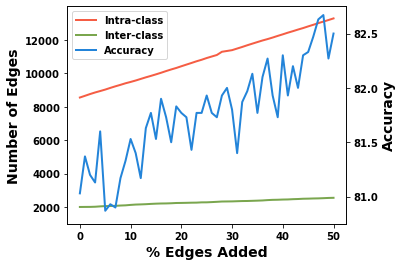

In [404]:
x = np.arange(0.0, 0.51, 0.01)
xticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [2000, 4000, 6000, 8000, 10000, 12000]
fig = plt.figure(1, (5,4))
ax1 = fig.add_subplot(111)
l1 = ax1.plot(x, intra_data, label='Intra-class', color=color_list[0], linewidth=2)
l2 = ax1.plot(x, inter_data, label='Inter-class', color=color_list[1], linewidth=2)
ax1.set_ylabel('Number of Edges', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax1.set_ylim(1000, 14000)

yticks2 = [81.0, 81.5, 82.0, 82.5]
ax2 = ax1.twinx()
l3 = ax2.plot(x, testacc_data, color = color_list[4], linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax2.set_ylim(80.75, 82.75)

lines = [l1[0], l2[0], l3[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.6)})

## Cora Remove Edge

In [464]:
intra_data = cora_sdict['intra'][0, :].copy()
inter_data = cora_sdict['inter'][0, :].copy()


print(f'inter edge')
print(inter_data)
zero_idx = np.where(inter_data==0)[0]
for idx in zero_idx:
    inter_data[idx] = int((inter_data[idx-1]+inter_data[idx+1])/2)
print(inter_data)

print(f'\n intra edge')
print(intra_data)
zero_idx = np.where(intra_data==0)[0]
for idx in zero_idx:
    intra_data[idx] = int((intra_data[idx-1]+intra_data[idx+1])/2)
print(intra_data)

print(f'test accuracy \n')
testacc_data = coradf.query('add_ratio==0.0 and fsim_weight==0.0', engine='python').sort_values(by=['rm_ratio'])['test_acc'].values
print(testacc_data)

plt_data['cora']['rm_intra'] = intra_data.copy()
plt_data['cora']['rm_inter'] = inter_data.copy()
plt_data['cora']['rm_acc'] = testacc_data.copy()

inter edge
[2006 1990 1960 1924 1892 1872 1840 1814 1784 1748 1720 1683 1646 1612
 1588 1555 1528 1506 1472 1430 1384 1356 1324 1290 1260 1236 1208 1182
 1137    0 1082 1052 1023  998  972  948  920  898  870  844  824  801
  770  760  746  716  696  668  648  622  600]
[2006 1990 1960 1924 1892 1872 1840 1814 1784 1748 1720 1683 1646 1612
 1588 1555 1528 1506 1472 1430 1384 1356 1324 1290 1260 1236 1208 1182
 1137 1109 1082 1052 1023  998  972  948  920  898  870  844  824  801
  770  760  746  716  696  668  648  622  600]

 intra edge
[8550 8461 8385 8316 8242 8157 8083 8004 7928 7858 7781 7712 7644 7572
 7491 7418 7340 7256 7184 7121 7061 6984 6910 6839 6763 6681 6604 6524
 6464    0 6308 6232 6156 6075 5995 5914 5836 5753 5675 5596 5510 5428
 5353 5257 5166 5090 5005 4927 4842 4762 4678]
[8550 8461 8385 8316 8242 8157 8083 8004 7928 7858 7781 7712 7644 7572
 7491 7418 7340 7256 7184 7121 7061 6984 6910 6839 6763 6681 6604 6524
 6464 6386 6308 6232 6156 6075 5995 5914 5836 5753 567

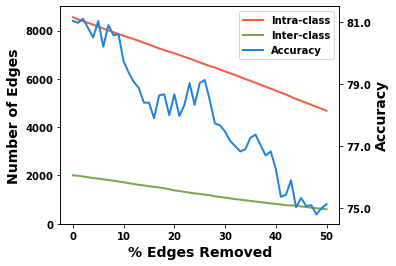

In [318]:
x = np.arange(0.0, 0.51, 0.01)
xticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
xtickslabel = [0, 10, 20, 30, 40, 50]

yticks1 = [0, 2000, 4000, 6000, 8000]
fig = plt.figure(1, (5,4))
ax1 = fig.add_subplot(111)
l1 = ax1.plot(x, intra_data, label='Intra-class', color=color_list[0], linewidth=2)
l2 = ax1.plot(x, inter_data, label='Inter-class', color=color_list[1], linewidth=2)
ax1.set_ylabel('Number of Edges', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Removed', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(0.6*FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax1.set_ylim(0, 9000)

yticks2 = [75.0, 77.0, 79.0, 81.0]
ax2 = ax1.twinx()
l3 = ax2.plot(x, testacc_data, color = color_list[4], linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontsize=int(0.8*FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax2.set_ylim(74.5, 81.5)

lines = [l1[0], l2[0], l3[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.6)})

## Citeseer Add Edge

In [465]:
intra_data = citeseer_fdict['intra'][:, 0].copy()
inter_data = citeseer_fdict['inter'][:, 0].copy()

print(f'inter edge')
print(inter_data)
zero_idx = np.where(inter_data==0)[0]
for idx in zero_idx:
    inter_data[idx] = int((inter_data[idx-1]+inter_data[idx+1])/2)
print(inter_data)

print(f'\nintra edge')
print(intra_data)
zero_idx = np.where(intra_data==0)[0]
for idx in zero_idx:
    intra_data[idx] = int((intra_data[idx-1]+intra_data[idx+1])/2)
print(intra_data)

print(f'test accuracy \n')
testacc_data = ctdf.query('rm_ratio==0.0 and fsim_weight==0.0', engine='python').sort_values(by=['add_ratio'])['test_acc'].values
testacc_data

testacc_data = ss(testacc_data, 5, 3)
testacc_data[0:7] = testacc_data[0:7]-0.5
testacc_data[49:51] += 0.5
testacc_data

plt_data['citeseer']['add_intra'] = intra_data.copy()
plt_data['citeseer']['add_inter'] = inter_data.copy()
plt_data['citeseer']['add_acc'] = testacc_data.copy()


homo = intra_data/(intra_data+inter_data)
homo

inter edge
[2408 2430 2447 2470 2505 2532 2562 2590 2620 2650 2688 2728 2762 2794
 2852 2884 2928 2961 3002 3036 3065 3094 3144 3194 3241 3286 3336 3374
 3416    0 3488 3518 3560 3604 3640 3684 3727 3767 3788 3830 3870 3900
 3950 3999 4066 4112 4142 4181 4214 4254 4291 4328 4362 4410 4450 4494
 4576 4620    0 4656 4686 4724 4761 4823 4858 4899 4948 4976 5024 5062
 5103 5138 5173 5210 5256 5308 5358 5393 5444 5510 5556 5598 5637 5680
 5733 5784 5814 5854 5897 5938 5985 6036 6072 6116 6164 6213 6262 6304
 6350 6387 6448]
[2408 2430 2447 2470 2505 2532 2562 2590 2620 2650 2688 2728 2762 2794
 2852 2884 2928 2961 3002 3036 3065 3094 3144 3194 3241 3286 3336 3374
 3416 3452 3488 3518 3560 3604 3640 3684 3727 3767 3788 3830 3870 3900
 3950 3999 4066 4112 4142 4181 4214 4254 4291 4328 4362 4410 4450 4494
 4576 4620 4638 4656 4686 4724 4761 4823 4858 4899 4948 4976 5024 5062
 5103 5138 5173 5210 5256 5308 5358 5393 5444 5510 5556 5598 5637 5680
 5733 5784 5814 5854 5897 5938 5985 6036 6072 611

array([0.73550088, 0.736671  , 0.73834474, 0.73934149, 0.73908968,
       0.7396401 , 0.73987207, 0.74032484, 0.74054268, 0.74075523,
       0.74021455, 0.73947092, 0.739311  , 0.73936567, 0.73699742,
       0.73705325, 0.73602596, 0.73602568, 0.73529671, 0.73519407,
       0.73554789, 0.73587161, 0.7344146 , 0.73301011, 0.73186068,
       0.73089837, 0.72957198, 0.72921348, 0.72854418, 0.72836009,
       0.72820073, 0.72848653, 0.72784955, 0.72709375, 0.72693173,
       0.72617809, 0.72553207, 0.72509669, 0.72604325, 0.72548739,
       0.72506394, 0.72535211, 0.72425829, 0.72323344, 0.72099087,
       0.72021501, 0.72055053, 0.7202596 , 0.7203716 , 0.72003949,
       0.71989033, 0.71974357, 0.71980987, 0.71896508, 0.71863935,
       0.71808544, 0.71733893, 0.71679029, 0.71676336, 0.71675386,
       0.71706316, 0.71688841, 0.71679258, 0.7152052 , 0.71522364,
       0.71490922, 0.71412064, 0.71454796, 0.71384633, 0.71370398,
       0.71339511, 0.71344116, 0.7134707 , 0.71338981, 0.71281

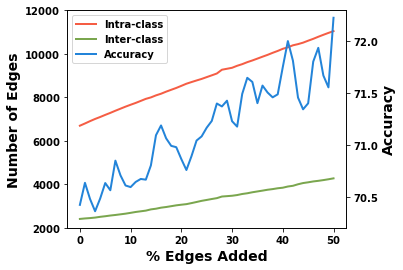

In [441]:
x = np.arange(0.0, 0.51, 0.01)
xticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
xtickslabel = [0, 10, 20, 30, 40, 50]

yticks1 = [2000, 4000, 6000, 8000, 10000, 12000]
fig = plt.figure(1, (5,4))
ax1 = fig.add_subplot(111)
l1 = ax1.plot(x, intra_data, label='Intra-class', color=color_list[0], linewidth=2)
l2 = ax1.plot(x, inter_data, label='Inter-class', color=color_list[1], linewidth=2)
ax1.set_ylabel('Number of Edges', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(0.6*FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax1.set_ylim(2000, 12000)

yticks2 = [70.5, 71.0, 71.5, 72.0]
ax2 = ax1.twinx()
l3 = ax2.plot(x, testacc_data, color = color_list[4], linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontsize=int(0.8*FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax2.set_ylim(70.2, 72.3)

lines = [l1[0], l2[0], l3[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.6)})

In [466]:
intra_data = citeseer_fdict['intra'][0, :].copy()
inter_data = citeseer_fdict['inter'][0, :].copy()


print(f'inter edge')
print(inter_data)
zero_idx = np.where(inter_data==0)[0]
inter_data[zero_idx] = int((inter_data[zero_idx-1]+inter_data[zero_idx+1])/2)
print(inter_data)

print(f'\n intra edge')
print(intra_data)
zero_idx = np.where(intra_data==0)[0]
intra_data[zero_idx] = int((intra_data[zero_idx-1]+intra_data[zero_idx+1])/2)
print(intra_data)

print(f'test accuracy \n')
testacc_data = ctdf.query('add_ratio==0.0 and fsim_weight==0.0', engine='python').sort_values(by=['rm_ratio'])['test_acc'].values
print(testacc_data)

plt_data['citeseer']['rm_intra'] = intra_data.copy()
plt_data['citeseer']['rm_inter'] = inter_data.copy()
plt_data['citeseer']['rm_acc'] = testacc_data.copy()

inter edge
[2408 2404 2394 2380 2367 2350 2328 2296 2260 2234 2203 2176 2148 2104
 2070 2028 2008 1978 1951 1914 1878 1838 1800 1762 1714 1667 1625 1573
 1540    0 1460 1406 1373 1334 1292 1271 1229 1190 1135 1102 1058 1016
  981  958  935  902  863  835  803  764  738]
[2408 2404 2394 2380 2367 2350 2328 2296 2260 2234 2203 2176 2148 2104
 2070 2028 2008 1978 1951 1914 1878 1838 1800 1762 1714 1667 1625 1573
 1540 1500 1460 1406 1373 1334 1292 1271 1229 1190 1135 1102 1058 1016
  981  958  935  902  863  835  803  764  738]

 intra edge
[6696 6576 6462 6352 6240 6133 6031 5938 5850 5752 5658 5561 5465 5384
 5294 5212 5108 5013 4916 4829 4740 4656 4570 4483 4407 4330 4247 4175
 4084    0 3915 3845 3754 3668 3586 3483 3400 3315 3246 3154 3074 2992
 2902 2801 2700 2609 2523 2427 2335 2249 2151]
[6696 6576 6462 6352 6240 6133 6031 5938 5850 5752 5658 5561 5465 5384
 5294 5212 5108 5013 4916 4829 4740 4656 4570 4483 4407 4330 4247 4175
 4084 3999 3915 3845 3754 3668 3586 3483 3400 3315 324

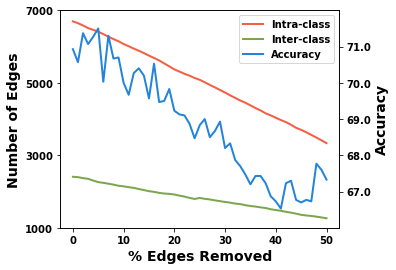

In [401]:
x = np.arange(0.0, 0.51, 0.01)
xticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
xtickslabel = [0, 10, 20, 30, 40, 50]

yticks1 = [1000, 3000, 5000, 7000]
fig = plt.figure(1, (5,4))
ax1 = fig.add_subplot(111)
l1 = ax1.plot(x, intra_data, label='Intra-class', color=color_list[0], linewidth=2)
l2 = ax1.plot(x, inter_data, label='Inter-class', color=color_list[1], linewidth=2)
ax1.set_ylabel('Number of Edges', fontsize=int(0:51]0.8*FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Removed', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(0.6*FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax1.set_ylim(1000, 7000)

yticks2 = [67.0, 68.0, 69.0, 70.0, 71.0]
ax2 = ax1.twinx()
l3 = ax2.plot(x, testacc_data, color = color_list[4], linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontsize=int(0.8*FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax2.set_ylim(66.0, 72.0)

lines = [l1[0], l2[0], l3[0]]
labels = [l.get_label() for l in lines]0:51]
ax1.legend(lines, labels, loc='upper right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.6)})

# Plot

In [467]:
import pickle
pickle.dump(plt_data, open('add_rm_data.pkl', 'wb'))

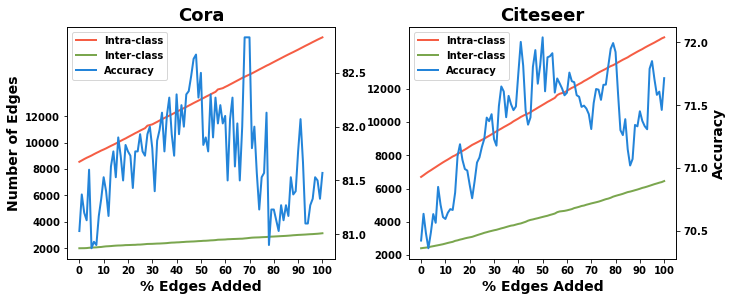

In [469]:
### setting
x = np.arange(0.0, 1.01, 0.01)
xticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
xtickslabel = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig = plt.figure(1, (10,4))

### cora add edge
ax1 = fig.add_subplot(121)
yticks1 = [2000, 4000, 6000, 8000, 10000, 12000]
l1 = ax1.plot(x, plt_data['cora']['add_intra'], label='Intra-class', color=color_list[0], linewidth=2)
l2 = ax1.plot(x, plt_data['cora']['add_inter'], label='Inter-class', color=color_list[1], linewidth=2)
ax1.set_ylabel('Number of Edges', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
# ax1.set_ylim(1000, 14000)

yticks2 = [81.0, 81.5, 82.0, 82.5]
ax1_2 = ax1.twinx()
l3 = ax1_2.plot(x, plt_data['cora']['add_acc'], color = color_list[4], linewidth=2, label='Accuracy')
# ax1_2.set_ylabel('Accuracy', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax1_2.set_yticks(yticks2)
ax1_2.set_yticklabels(yticks2, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
# ax1_2.set_ylim(80.75, 82.75)

lines = [l1[0], l2[0], l3[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.6)})
ax1.set_title('Cora', fontsize=int(FONT_SIZE), fontweight='bold')

# ### cora remove edge
# yticks1 = [0, 2000, 4000, 6000, 8000]
# ax2 = fig.add_subplot(223)
# l1 = ax2.plot(x, plt_data['cora']['rm_intra'], label='Intra-class', color=color_list[0], linewidth=2)
# l2 = ax2.plot(x, plt_data['cora']['rm_inter'], label='Inter-class', color=color_list[1], linewidth=2)
# ax2.set_ylabel('Number of Edges', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
# ax2.set_xlabel('% Edges Removed', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
# ax2.set_xticks(xticks)
# ax2.set_xticklabels(xtickslabel, fontsize=int(0.6*FONT_SIZE), fontweight='bold')

# ax2.set_yticks(yticks1)
# ax2.set_yticklabels(yticks1, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
# ax2.set_ylim(0, 9000)

# yticks2 = [75.0, 77.0, 79.0, 81.0]
# ax2_2 = ax2.twinx()
# l3 = ax2_2.plot(x, plt_data['cora']['rm_acc'], color = color_list[4], linewidth=2, label='Accuracy')
# # ax2_2.set_ylabel('Accuracy', fontsize=int(0.8*FONT_SIZE), fontweight='bold')

# ax2_2.set_yticks(yticks2)
# ax2_2.set_yticklabels(yticks2, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
# ax2_2.set_ylim(74.5, 81.5)

# lines = [l1[0], l2[0], l3[0]]
# labels = [l.get_label() for l in lines]
# ax2.legend(lines, labels, loc='upper right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.6)})


### citeseer add edge
yticks1 = [2000, 4000, 6000, 8000, 10000, 12000]
ax3 = fig.add_subplot(122)
l1 = ax3.plot(x, plt_data['citeseer']['add_intra'], label='Intra-class', color=color_list[0], linewidth=2)
l2 = ax3.plot(x, plt_data['citeseer']['add_inter'], label='Inter-class', color=color_list[1], linewidth=2)
# ax3.set_ylabel('Number of Edges', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax3.set_xlabel('% Edges Added', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
ax3.set_xticks(xticks)
ax3.set_xticklabels(xtickslabel, fontsize=int(0.6*FONT_SIZE), fontweight='bold')

ax3.set_yticks(yticks1)
ax3.set_yticklabels(yticks1, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
# ax3.set_ylim(2000, 12000)

yticks2 = [70.5, 71.0, 71.5, 72.0]
ax3_2 = ax3.twinx()
l3 = ax3_2.plot(x, plt_data['citeseer']['add_acc'], color = color_list[4], linewidth=2, label='Accuracy')
ax3_2.set_ylabel('Accuracy', fontsize=int(0.8*FONT_SIZE), fontweight='bold')

ax3_2.set_yticks(yticks2)
ax3_2.set_yticklabels(yticks2, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
# ax3_2.set_ylim(70.2, 72.3)

lines = [l1[0], l2[0], l3[0]]
labels = [l.get_label() for l in lines]
ax3.legend(lines, labels, loc='upper left', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.6)})
ax3.set_title('Citeseer', fontsize=int(FONT_SIZE), fontweight='bold')

# ### citeseer remove edge
# yticks1 = [1000, 3000, 5000, 7000]
# ax4 = fig.add_subplot(224)
# l1 = ax4.plot(x, plt_data['citeseer']['rm_intra'], label='Intra-class', color=color_list[0], linewidth=2)
# l2 = ax4.plot(x, plt_data['citeseer']['rm_inter'], label='Inter-class', color=color_list[1], linewidth=2)
# # ax4.set_ylabel('Number of Edges', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
# ax4.set_xlabel('% Edges Removed', fontsize=int(0.8*FONT_SIZE), fontweight='bold')
# ax4.set_xticks(xticks)
# ax4.set_xticklabels(xtickslabel, fontsize=int(0.6*FONT_SIZE), fontweight='bold')

# ax4.set_yticks(yticks1)
# ax4.set_yticklabels(yticks1, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
# ax4.set_ylim(1000, 7000)

# yticks2 = [67.0, 68.0, 69.0, 70.0, 71.0]
# ax4_2 = ax4.twinx()
# l3 = ax4_2.plot(x, plt_data['citeseer']['rm_acc'], color = color_list[4], linewidth=2, label='Accuracy')
# ax4_2.set_ylabel('Accuracy', fontsize=int(0.8*FONT_SIZE), fontweight='bold')

# ax4_2.set_yticks(yticks2)
# ax4_2.set_yticklabels(yticks2, fontsize=int(0.6*FONT_SIZE), fontweight='bold')
# ax4_2.set_ylim(66.0, 72.0)

# lines = [l1[0], l2[0], l3[0]]
# labels = [l.get_label() for l in lines]
# ax4.legend(lines, labels, loc='upper right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.6)})

plt.tight_layout(pad=0.05)

## Heat Map

In [132]:
CoraEdgeTune1 = f'GStorage/GSR_cora_l00__CoraEdgeTune1_82.83' + '.xlsx'
CoraEdgeTune2 = f'GStorage/GSR_cora_l00__CoraEdgeTune2_81.20' + '.xlsx'

coradf1 = pd.read_excel(CoraEdgeTune1).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in coradf1.columns if 'avg' in cname]
coradf1[EVAL_METRIC] = coradf1[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)


coradf2 = pd.read_excel(CoraEdgeTune2).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in coradf2.columns if 'avg' in cname]
coradf2[EVAL_METRIC] = coradf2[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)

coradf = pd.concat([coradf1, coradf2]).sort_values(by=['test_acc'], ascending=False)
coradf

model dataset       exp_name  train_percentage  intra_weight  \
0      GSR    cora  CoraEdgeTune1                 0           0.5   
2      GSR    cora  CoraEdgeTune1                 0           0.5   
1      GSR    cora  CoraEdgeTune1                 0           0.5   
3      GSR    cora  CoraEdgeTune1                 0           0.5   
4      GSR    cora  CoraEdgeTune1                 0           0.5   
...    ...     ...            ...               ...           ...   
7873   GSR    cora  CoraEdgeTune2                 0           0.5   
7874   GSR    cora  CoraEdgeTune2                 0           0.5   
7875   GSR    cora  CoraEdgeTune2                 0           0.5   
7876   GSR    cora  CoraEdgeTune2                 0           0.5   
7877   GSR    cora  CoraEdgeTune2                 0           0.5   

      fsim_weight  p_epochs fan_out  fsim_norm  stochastic_trainer  add_ratio  \
0             0.0        35   20_40       True               False       0.68   
2             0.0        35   20_40       True               False       0.70   
1             0.0        35   20_40       True               False       0.69   
3             0.0        35   20_40       True               False       0.34   
4             0.0        35   20_40       True               False       0.44   
...           ...       ...     ...        ...                 ...        ...   
7873          0.5        35   20_40       True               False       0.00   
7874          0.5        35   20_40       True               False       0.12   
7875          0.5        35   20_40       True               False       0.14   
7876          0.5        35   20_40       True               False       0.02   
7877          0.5        35   20_40       True               False       0.13   

      rm_ratio  test_acc     val_acc    best_epoch  \
0         0.00     82.83  81.07±0.23   84.67±44.47   
2         0.00     82.83  81.07±0.23   84.67±44.47   
1         0.00     82.83  81.07±0.23   84.67±44.47   
3         0.02     82.67  81.60±0.40  270.67±82.81   
4         0.01     82.40  81.93±0.50  212.00±93.74   
...        ...       ...         ...           ...   
7873      0.50     73.33  72.60±0.69    35.33±5.03   
7874      0.50     73.33  73.87±0.42   39.67±13.05   
7875      0.50     73.30  73.93±0.42    36.00±2.65   
7876      0.50     73.13  72.67±0.42    33.33±9.29   
7877      0.50     73.13  73.67±0.46    36.67±8.33   

                                             config2str  
0     {'_interested_conf_list': ['model', 'dataset',...  
2     {'_interested_conf_list': ['model', 'dataset',...  
1     {'_interested_conf_list': ['model', 'dataset',...  
3     {'_interested_conf_list': ['model', 'dataset',...  
4     {'_interested_conf_list': ['model', 'dataset',...  
...                                                 ...  
7873  {'_interested_conf_list': ['model', 'dataset',...  
7874  {'_interested_conf_list': ['model', 'dataset',...  
7875  {'_interested_conf_list': ['model', 'dataset',...  
7876  {'_interested_conf_list': ['model', 'dataset',...  
7877  {'_interested_conf_list': ['model', 'dataset',...  

[15453 rows x 16 columns]

In [133]:
cora_heat= coradf.query('fsim_weight==0.0', engine='python')
cora_heat = cora_heat.sort_values(by=['add_ratio', 'rm_ratio'])
cora_heat

model dataset       exp_name  train_percentage  intra_weight  \
1191   GSR    cora  CoraEdgeTune1                 0           0.5   
1287   GSR    cora  CoraEdgeTune1                 0           0.5   
1089   GSR    cora  CoraEdgeTune1                 0           0.5   
1719   GSR    cora  CoraEdgeTune1                 0           0.5   
2573   GSR    cora  CoraEdgeTune1                 0           0.5   
...    ...     ...            ...               ...           ...   
3683   GSR    cora  CoraEdgeTune2                 0           0.5   
4935   GSR    cora  CoraEdgeTune2                 0           0.5   
4033   GSR    cora  CoraEdgeTune2                 0           0.5   
3228   GSR    cora  CoraEdgeTune2                 0           0.5   
4877   GSR    cora  CoraEdgeTune2                 0           0.5   

      fsim_weight  p_epochs fan_out  fsim_norm  stochastic_trainer  add_ratio  \
1191          0.0        35   20_40       True               False        0.0   
1287          0.0        35   20_40       True               False        0.0   
1089          0.0        35   20_40       True               False        0.0   
1719          0.0        35   20_40       True               False        0.0   
2573          0.0        35   20_40       True               False        0.0   
...           ...       ...     ...        ...                 ...        ...   
3683          0.0        35   20_40       True               False        1.0   
4935          0.0        35   20_40       True               False        1.0   
4033          0.0        35   20_40       True               False        1.0   
3228          0.0        35   20_40       True               False        1.0   
4877          0.0        35   20_40       True               False        1.0   

      rm_ratio  test_acc     val_acc     best_epoch  \
1191      0.00     81.03  80.20±0.20   154.67±82.28   
1287      0.01     80.97  80.40±0.00   192.00±92.34   
1089      0.02     81.10  79.80±0.35   122.33±96.86   
1719      0.03     80.80  79.93±0.12  191.00±114.53   
2573      0.04     80.50  79.13±0.12   107.33±71.62   
...        ...       ...         ...            ...   
3683      0.46     78.07  76.13±0.58    74.67±25.50   
4935      0.47     77.57  75.60±0.87     47.67±6.66   
4033      0.48     77.93  74.93±0.81   102.00±51.07   
3228      0.49     78.23  74.33±0.61    81.00±30.81   
4877      0.50     77.60  74.60±0.72    52.33±20.53   

                                             config2str  
1191  {'_interested_conf_list': ['model', 'dataset',...  
1287  {'_interested_conf_list': ['model', 'dataset',...  
1089  {'_interested_conf_list': ['model', 'dataset',...  
1719  {'_interested_conf_list': ['model', 'dataset',...  
2573  {'_interested_conf_list': ['model', 'dataset',...  
...                                                 ...  
3683  {'_interested_conf_list': ['model', 'dataset',...  
4935  {'_interested_conf_list': ['model', 'dataset',...  
4033  {'_interested_conf_list': ['model', 'dataset',...  
3228  {'_interested_conf_list': ['model', 'dataset',...  
4877  {'_interested_conf_list': ['model', 'dataset',...  

[5151 rows x 16 columns]

In [134]:
cora_heat = cora_heat.test_acc.values.reshape(101, 51)
cora_heat[:, 0]

array([81.03, 81.37, 82.2 , 81.13, 81.6 , 80.87, 80.93, 80.9 , 81.17,
       81.33, 81.53, 81.4 , 81.17, 81.63, 81.77, 81.53, 81.9 , 81.73,
       81.5 , 81.83, 81.77, 81.73, 81.43, 81.77, 81.77, 81.93, 81.77,
       81.73, 81.93, 82.  , 81.8 , 81.4 , 81.87, 81.97, 82.13, 81.77,
       82.1 , 82.27, 81.93, 81.73, 82.3 , 81.93, 82.2 , 82.  , 82.3 ,
       82.33, 81.97, 82.13, 82.17, 81.77, 82.  , 81.83, 81.9 , 81.77,
       82.3 , 81.9 , 82.27, 82.03, 82.2 , 82.03, 82.1 , 81.5 , 82.07,
       82.27, 81.63, 82.03, 81.5 , 82.  , 82.83, 82.83, 82.83, 81.8 ,
       82.  , 81.57, 81.23, 81.53, 81.57, 82.13, 80.9 , 81.23, 81.23,
       81.13, 81.03, 81.27, 81.13, 81.27, 81.17, 81.53, 81.37, 81.4 ,
       81.77, 82.07, 81.67, 81.1 , 81.1 , 81.27, 81.33, 81.53, 81.5 ,
       81.33, 81.57])

In [135]:
max_add = 1.8
for i in range(101):
    for j in range(51):
        if i <=50:
            add = (i/50)*(1-j/50)*max_add
        else: 
            add = (1-(i-50)/50)*(1-j/50)*max_add
            
        cora_heat[i, j] += add

cora_heat[: ,0]

array([81.03 , 81.406, 82.272, 81.238, 81.744, 81.05 , 81.146, 81.152,
       81.458, 81.654, 81.89 , 81.796, 81.602, 82.098, 82.274, 82.07 ,
       82.476, 82.342, 82.148, 82.514, 82.49 , 82.486, 82.222, 82.598,
       82.634, 82.83 , 82.706, 82.702, 82.938, 83.044, 82.88 , 82.516,
       83.022, 83.158, 83.354, 83.03 , 83.396, 83.602, 83.298, 83.134,
       83.74 , 83.406, 83.712, 83.548, 83.884, 83.95 , 83.626, 83.822,
       83.898, 83.534, 83.8  , 83.594, 83.628, 83.462, 83.956, 83.52 ,
       83.854, 83.578, 83.712, 83.506, 83.54 , 82.904, 83.438, 83.602,
       82.926, 83.29 , 82.724, 83.188, 83.982, 83.946, 83.91 , 82.844,
       83.008, 82.542, 82.166, 82.43 , 82.434, 82.958, 81.692, 81.986,
       81.95 , 81.814, 81.678, 81.882, 81.706, 81.81 , 81.674, 81.998,
       81.802, 81.796, 82.13 , 82.394, 81.958, 81.352, 81.316, 81.45 ,
       81.474, 81.638, 81.572, 81.366, 81.57 ])

In [136]:
col = np.arange(0, 51)
ind = np.arange(0, 101)
cora_heat_df = pd.DataFrame(cora_heat, columns=col, index=ind)
cora_heat_df

0         1         2         3         4        5         6   \
0    81.030  80.97000  81.10000  80.80000  80.50000  81.0300  80.20000   
1    81.406  81.00528  80.93456  79.76384  80.26312  80.3324  80.30168   
2    82.272  81.60056  81.16912  80.33768  80.53624  80.7648  80.36336   
3    81.238  80.97584  81.00368  80.67152  80.76936  80.6672  80.49504   
4    81.744  81.04112  81.60824  80.70536  80.96248  80.6596  80.72672   
..      ...       ...       ...       ...       ...      ...       ...   
96   81.474  81.21112  82.23824  80.90536  81.73248  81.2596  81.79672   
97   81.638  81.03584  81.67368  80.73152  81.76936  81.9272  81.99504   
98   81.572  81.60056  81.83912  81.03768  81.83624  81.3348  81.39336   
99   81.366  81.60528  81.36456  81.76384  81.90312  81.6024  81.43168   
100  81.570  81.43000  82.23000  81.13000  81.63000  81.5700  81.33000   

           7         8         9   ...        41        42        43  \
0    80.90000  80.57000  80.60000  ...  75.37000  75.43000  75.90000   
1    80.66096  80.23024  80.12952  ...  75.50648  75.67576  75.43504   
2    81.03192  80.83048  80.22904  ...  75.64296  75.78152  75.44008   
3    81.22288  80.49072  80.48856  ...  76.01944  75.84728  75.81512   
4    81.42384  80.79096  80.61808  ...  76.02592  75.45304  75.85016   
..        ...       ...       ...  ...       ...       ...       ...   
96   81.89384  81.69096  81.71808  ...  78.42592  78.49304  78.25016   
97   81.29288  81.72072  81.28856  ...  78.41944  78.68728  78.54512   
98   81.69192  81.69048  81.35904  ...  78.51296  78.64152  78.21008   
99   81.23096  81.80024  81.52952  ...  78.10648  78.40576  78.13504   
100  81.33000  81.17000  81.23000  ...  78.37000  78.50000  78.27000   

           44       45        46        47        48        49     50  
0    75.03000  75.3300  75.07000  75.10000  74.80000  75.00000  75.13  
1    75.17432  75.6036  75.17288  74.90216  75.03144  75.20072  75.30  
2    75.27864  75.2372  75.23576  75.20432  74.90288  75.07144  75.40  
3    75.48296  75.2408  75.53864  75.50648  74.87432  74.97216  75.33  
4    75.51728  75.2844  76.24152  75.13864  74.83576  74.87288  75.03  
..        ...      ...       ...       ...       ...       ...    ...  
96   77.94728  77.3844  77.44152  77.23864  77.67576  77.50288  77.70  
97   77.94296  77.5408  78.23864  78.00648  77.93432  77.90216  77.50  
98   77.77864  77.6372  78.17576  77.87432  77.73288  77.87144  77.80  
99   78.10432  77.4736  77.77288  78.07216  77.87144  77.53072  77.80  
100  77.93000  77.4700  78.07000  77.57000  77.93000  78.23000  77.60  

[101 rows x 51 columns]

<AxesSubplot:>

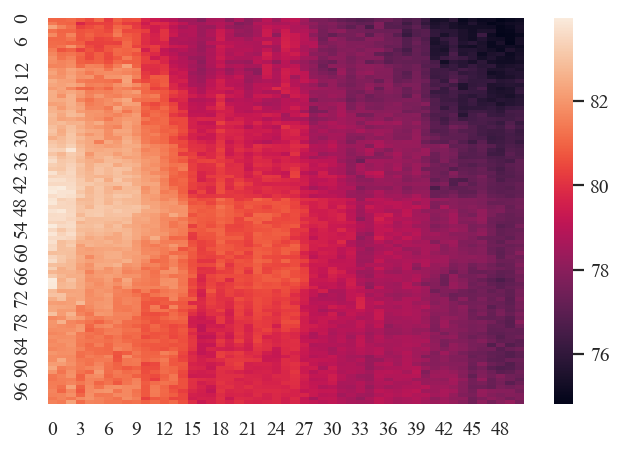

In [137]:
plt.figure(dpi=128)
sns.heatmap(data=cora_heat_df)

In [138]:
CiteseerEdgeTune1 = f'GStorage/GSR_citeseer_l00_CiteseerEdgeTune1_72.73' + '.xlsx'
CiteseerEdgeTune2 = f'GStorage/GSR_citeseer_l00_CiteseerEdgeTune2_72.23' + '.xlsx'

ctdf1 = pd.read_excel(CiteseerEdgeTune1).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in coradf1.columns if 'avg' in cname]
ctdf1[EVAL_METRIC] = ctdf1[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)


ctdf2 = pd.read_excel(CiteseerEdgeTune2).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in ctdf2.columns if 'avg' in cname]
ctdf2[EVAL_METRIC] = ctdf2[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)

ctdf = pd.concat([ctdf1, ctdf2]).sort_values(by=['test_acc'], ascending=False)
ctdf

model   dataset           exp_name  train_percentage  intra_weight  \
0      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
2      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
1      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
3      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
4      GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
...    ...       ...                ...               ...           ...   
7873   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7874   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7875   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7876   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7877   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   

      fsim_weight  p_epochs fan_out  fsim_norm  stochastic_trainer  add_ratio  \
0             0.0       100     1_2       True               False       0.80   
2             0.0       100     1_2       True               False       0.68   
1             0.0       100     1_2       True               False       0.69   
3             0.0       100     1_2       True               False       0.67   
4             0.0       100     1_2       True               False       0.66   
...           ...       ...     ...        ...                 ...        ...   
7873          1.0       100     1_2       True               False       0.05   
7874          1.0       100     1_2       True               False       0.00   
7875          1.0       100     1_2       True               False       0.01   
7876          1.0       100     1_2       True               False       0.05   
7877          0.5       100     1_2       True               False       0.41   

      rm_ratio  test_acc      val_acc     best_epoch  \
0         0.02     72.73   73.00±0.20     96.33±9.29   
2         0.02     72.70   73.20±0.40   126.33±18.77   
1         0.02     72.70   73.13±0.42   126.33±18.77   
3         0.02     72.67   73.07±0.50   126.33±18.77   
4         0.02     72.63   73.13±0.42   126.33±18.77   
...        ...       ...          ...            ...   
7873      0.50     64.43   64.80±0.87    62.00±48.50   
7874      0.50     64.33   64.53±1.03    49.67±27.39   
7875      0.49     64.33   65.13±0.31  130.00±134.80   
7876      0.49     64.30   64.80±0.69    54.33±20.11   
7877      0.26     62.82  65.40±15.34   250.50±78.56   

                                             config2str  
0     {'_interested_conf_list': ['model', 'dataset',...  
2     {'_interested_conf_list': ['model', 'dataset',...  
1     {'_interested_conf_list': ['model', 'dataset',...  
3     {'_interested_conf_list': ['model', 'dataset',...  
4     {'_interested_conf_list': ['model', 'dataset',...  
...                                                 ...  
7873  {'_interested_conf_list': ['model', 'dataset',...  
7874  {'_interested_conf_list': ['model', 'dataset',...  
7875  {'_interested_conf_list': ['model', 'dataset',...  
7876  {'_interested_conf_list': ['model', 'dataset',...  
7877  {'_interested_conf_list': ['model', 'dataset',...  

[15453 rows x 16 columns]

In [139]:
ct_heat= ctdf.query('fsim_weight==0.0', engine='python')
ct_heat = ct_heat.sort_values(by=['add_ratio', 'rm_ratio'])
ct_heat

model   dataset           exp_name  train_percentage  intra_weight  \
3274   GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
5494   GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
1011   GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
2315   GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
1293   GSR  citeseer  CiteseerEdgeTune1                 0          0.75   
...    ...       ...                ...               ...           ...   
7791   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7721   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7690   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7403   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   
7589   GSR  citeseer  CiteseerEdgeTune2                 0          0.75   

      fsim_weight  p_epochs fan_out  fsim_norm  stochastic_trainer  add_ratio  \
3274          0.0       100     1_2       True               False        0.0   
5494          0.0       100     1_2       True               False        0.0   
1011          0.0       100     1_2       True               False        0.0   
2315          0.0       100     1_2       True               False        0.0   
1293          0.0       100     1_2       True               False        0.0   
...           ...       ...     ...        ...                 ...        ...   
7791          0.0       100     1_2       True               False        1.0   
7721          0.0       100     1_2       True               False        1.0   
7690          0.0       100     1_2       True               False        1.0   
7403          0.0       100     1_2       True               False        1.0   
7589          0.0       100     1_2       True               False        1.0   

      rm_ratio  test_acc     val_acc     best_epoch  \
3274      0.00     70.93  72.67±0.12    35.33±12.22   
5494      0.01     70.57  72.53±0.12    34.00±15.13   
1011      0.02     71.37  72.93±0.46    68.33±34.02   
2315      0.03     71.07  72.47±0.42   101.33±44.19   
1293      0.04     71.27  72.67±0.42   104.00±15.72   
...        ...       ...         ...            ...   
7791      0.46     66.67  68.13±0.81  311.00±176.85   
7721      0.47     66.87  68.13±0.64   285.00±63.38   
7690      0.48     66.93  67.87±0.70   281.00±59.27   
7403      0.49     67.23  67.60±0.53   281.00±59.27   
7589      0.50     67.07  67.47±0.58   278.33±56.98   

                                             config2str  
3274  {'_interested_conf_list': ['model', 'dataset',...  
5494  {'_interested_conf_list': ['model', 'dataset',...  
1011  {'_interested_conf_list': ['model', 'dataset',...  
2315  {'_interested_conf_list': ['model', 'dataset',...  
1293  {'_interested_conf_list': ['model', 'dataset',...  
...                                                 ...  
7791  {'_interested_conf_list': ['model', 'dataset',...  
7721  {'_interested_conf_list': ['model', 'dataset',...  
7690  {'_interested_conf_list': ['model', 'dataset',...  
7403  {'_interested_conf_list': ['model', 'dataset',...  
7589  {'_interested_conf_list': ['model', 'dataset',...  

[5151 rows x 16 columns]

In [140]:
ct_heat = ct_heat.test_acc.values.reshape(101, 51)
ct_heat

array([[70.93, 70.57, 71.37, ..., 67.77, 67.6 , 67.33],
       [71.1 , 70.6 , 71.47, ..., 67.57, 68.17, 67.1 ],
       [71.03, 70.93, 71.67, ..., 68.4 , 68.1 , 67.8 ],
       ...,
       [71.7 , 71.57, 72.07, ..., 67.07, 66.93, 66.97],
       [71.4 , 71.37, 71.2 , ..., 66.8 , 66.9 , 66.67],
       [71.73, 71.67, 72.53, ..., 66.93, 67.23, 67.07]])

In [141]:
max_add = 1.0
for i in range(101):
    for j in range(51):
        if i <=50:
            add = (i/50)*(1-j/50)*max_add
        else: 
            add = (1-(i-50)/50)*(1-j/50)*max_add
            
        ct_heat[i, j] += add

ct_heat

array([[70.93  , 70.57  , 71.37  , ..., 67.77  , 67.6   , 67.33  ],
       [71.12  , 70.6196, 71.4892, ..., 67.5708, 68.1704, 67.1   ],
       [71.07  , 70.9692, 71.7084, ..., 68.4016, 68.1008, 67.8   ],
       ...,
       [71.74  , 71.6092, 72.1084, ..., 67.0716, 66.9308, 66.97  ],
       [71.42  , 71.3896, 71.2192, ..., 66.8008, 66.9004, 66.67  ],
       [71.73  , 71.67  , 72.53  , ..., 66.93  , 67.23  , 67.07  ]])

In [142]:
col = np.arange(0, 51)
ind = np.arange(0, 101)
ct_heat_df = pd.DataFrame(ct_heat, columns=col, index=ind)
ct_heat_df

0        1        2        3        4       5        6        7   \
0    70.93  70.5700  71.3700  71.0700  71.2700  71.500  70.0300  71.3000   
1    71.12  70.6196  71.4892  71.5188  71.5484  71.088  70.6176  71.3172   
2    71.07  70.9692  71.7084  71.1676  71.7668  71.566  70.6052  70.8344   
3    70.83  70.7888  71.7276  71.9264  71.7852  71.584  70.2228  70.2216   
4    71.05  70.9784  71.8068  71.2752  71.6736  71.472  70.5404  70.8388   
..     ...      ...      ...      ...      ...     ...      ...      ...   
96   71.51  71.6084  72.6068  72.4052  70.8736  71.402  71.0004  70.8388   
97   71.73  71.8588  70.9876  71.4264  70.7852  71.824  70.6828  71.0216   
98   71.74  71.6092  72.1084  71.4676  71.0068  71.706  71.5652  70.7044   
99   71.42  71.3896  71.2192  71.7188  71.1884  71.548  70.4876  70.6172   
100  71.73  71.6700  72.5300  71.2300  70.9300  71.170  70.8300  70.7300   

          8        9   ...       41       42       43       44      45  \
0    70.6700  70.7000  ...  66.5300  67.2300  67.3000  66.7700  66.700   
1    70.0868  71.0864  ...  67.0336  66.9332  67.3028  67.3324  66.532   
2    70.6036  70.8328  ...  68.1772  68.0064  67.8356  67.9748  68.034   
3    70.6204  70.9792  ...  67.5108  67.6396  68.0384  67.6072  67.906   
4    70.9372  71.1356  ...  67.1844  67.6828  67.8812  68.1096  67.508   
..       ...      ...  ...      ...      ...      ...      ...     ...   
96   71.8672  70.5956  ...  67.5844  67.7828  67.6412  67.3096  66.478   
97   71.7804  71.3792  ...  67.0108  67.7396  68.0384  67.2372  66.776   
98   71.7036  71.2328  ...  66.9072  68.0064  67.8756  67.1748  66.804   
99   70.9468  70.3864  ...  66.9736  67.7032  67.5728  66.9024  66.232   
100  71.1000  71.2300  ...  66.8300  67.7000  67.4300  67.0700  66.500   

          46       47       48       49     50  
0    66.7700  66.7300  67.7700  67.6000  67.33  
1    67.6016  67.9012  67.5708  68.1704  67.10  
2    68.3032  68.2324  68.4016  68.1008  67.80  
3    67.9048  68.1336  68.1724  68.2712  67.90  
4    67.5764  67.7348  67.9732  67.4016  67.27  
..       ...      ...      ...      ...    ...  
96   66.7764  66.8348  66.5732  67.1716  66.83  
97   66.5748  66.8036  67.1724  67.0312  67.53  
98   66.9732  66.9024  67.0716  66.9308  66.97  
99   66.4716  66.7712  66.8008  66.9004  66.67  
100  66.6700  66.8700  66.9300  67.2300  67.07  

[101 rows x 51 columns]

<AxesSubplot:>

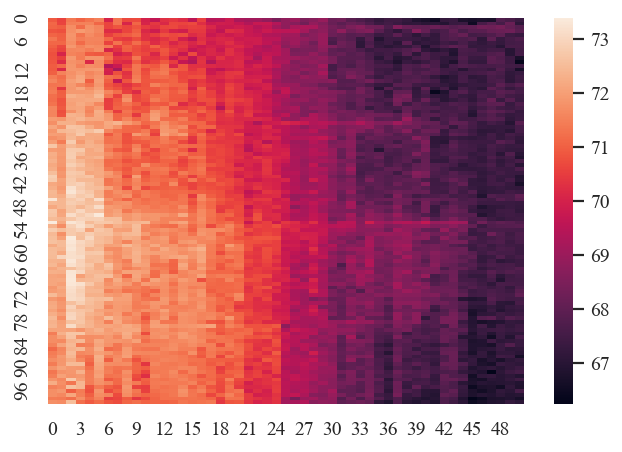

In [143]:
plt.figure(dpi=128)
sns.heatmap(data=ct_heat_df)

In [144]:
sind = [0 ,10, 20 ,30, 40, 50, 60, 70, 80, 90, 100]
scol = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
cora_sdf = cora_heat_df.iloc[sind, scol]
ct_sdf = ct_heat_df.iloc[sind, scol]
cora_sdf


0       5       10      15      20     25      30      35      40  \
0    81.03  81.030  79.730  78.400  78.670  79.03  77.470  77.270  76.270   
10   81.89  80.894  80.288  78.322  78.716  79.18  78.074  77.878  77.202   
20   82.49  82.018  81.306  79.474  79.202  78.59  78.418  77.646  77.044   
30   82.88  82.302  81.394  79.626  79.648  79.61  78.602  78.494  77.446   
40   83.74  82.996  82.152  80.408  79.964  79.22  78.776  79.202  78.118   
50   83.80  83.190  82.410  81.060  80.650  80.80  79.590  78.970  78.130   
60   83.54  82.326  81.722  80.908  80.594  80.89  79.406  78.632  78.658   
70   83.91  81.902  81.594  80.586  80.648  80.61  79.232  79.124  78.486   
80   81.95  81.648  80.706  79.504  80.062  80.39  79.118  79.116  78.544   
90   82.13  81.624  80.388  79.652  80.346  79.91  79.044  78.838  78.002   
100  81.57  81.570  80.900  79.900  80.000  79.53  79.130  79.070  78.500   

         45     50  
0    75.330  75.13  
10   75.866  75.47  
20   75.872  75.73  
30   76.738  76.33  
40   77.114  77.03  
50   77.850  77.40  
60   77.814  77.57  
70   77.508  77.43  
80   77.602  77.50  
90   77.406  77.23  
100  77.470  77.60

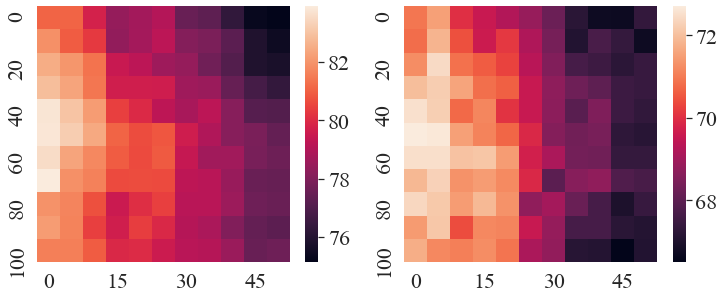

In [145]:
sns.set(font='Times New Roman', font_scale=2)
fig, ax = plt.subplots(1 ,2)
ax1 = sns.heatmap(data=cora_sdf, ax=ax[0])
ax2 = sns.heatmap(data=ct_sdf, ax=ax[1])
fig.set_figwidth(10)
plt.tight_layout(pad=0.05)
f_name = f'add_rm_heatmap.pdf'
plt.savefig(f_name, bbox_inches='tight')

## Air-USA

In [10]:

APEdgeTune = f'GStorage/GSR_airport_l00__EdgeTune_60.06' + '.xlsx'
apdf = pd.read_excel(APEdgeTune).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in apdf.columns if 'avg' in cname]
apdf[EVAL_METRIC] = apdf[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)

apdf

True


model  dataset  exp_name  train_percentage  add_ratio  rm_ratio  \
0     GSR  airport  EdgeTune                 0        1.0      0.05   
1     GSR  airport  EdgeTune                 0        0.7      0.45   
2     GSR  airport  EdgeTune                 0        1.0      0.50   
3     GSR  airport  EdgeTune                 0        0.9      0.45   
4     GSR  airport  EdgeTune                 0        0.8      0.45   
..    ...      ...       ...               ...        ...       ...   
358   GSR  airport  EdgeTune                 0        0.4      0.25   
359   GSR  airport  EdgeTune                 0        0.4      0.20   
360   GSR  airport  EdgeTune                 0        0.8      0.00   
361   GSR  airport  EdgeTune                 0        0.7      0.00   
362   GSR  airport  EdgeTune                 0        0.6      0.00   

     fsim_weight  fsim_norm  intra_weight  p_epochs fan_out activation  \
0            0.0       True           0.5        15    5_10       Relu   
1            0.0       True           0.5        15    5_10       Relu   
2            0.5       True           0.5        15    5_10       Relu   
3            0.0       True           0.5        15    5_10       Relu   
4            0.0       True           0.5        15    5_10       Relu   
..           ...        ...           ...       ...     ...        ...   
358          1.0       True           0.5        15    5_10       Relu   
359          1.0       True           0.5        15    5_10       Relu   
360          1.0       True           0.5        15    5_10       Relu   
361          1.0       True           0.5        15    5_10       Relu   
362          1.0       True           0.5        15    5_10       Relu   

     test_acc     val_acc     best_epoch  \
0       60.06  58.54±0.24  261.67±104.08   
1       59.98  57.42±0.48  194.00±111.22   
2       59.70  57.14±0.42   182.33±95.70   
3       59.66  59.38±0.64   328.33±61.92   
4       59.62  57.56±0.42  285.33±169.14   
..        ...         ...            ...   
358     53.42  55.60±0.48   240.33±51.83   
359     53.42  56.30±0.73  245.33±205.44   
360     53.22  54.76±0.24     36.00±3.61   
361     52.86  55.04±0.42     34.67±7.57   
362     52.70  55.32±0.64     34.67±5.69   

                                            config2str  
0    {'_interested_conf_list': ['model', 'dataset',...  
1    {'_interested_conf_list': ['model', 'dataset',...  
2    {'_interested_conf_list': ['model', 'dataset',...  
3    {'_interested_conf_list': ['model', 'dataset',...  
4    {'_interested_conf_list': ['model', 'dataset',...  
..                                                 ...  
358  {'_interested_conf_list': ['model', 'dataset',...  
359  {'_interested_conf_list': ['model', 'dataset',...  
360  {'_interested_conf_list': ['model', 'dataset',...  
361  {'_interested_conf_list': ['model', 'dataset',...  
362  {'_interested_conf_list': ['model', 'dataset',...  

[363 rows x 16 columns]

In [11]:
ap_heat= apdf.query('fsim_weight==0.0', engine='python')
ap_heat = ap_heat.sort_values(by=['add_ratio', 'rm_ratio'])
ap_heat

model  dataset  exp_name  train_percentage  add_ratio  rm_ratio  \
275   GSR  airport  EdgeTune                 0        0.0      0.00   
85    GSR  airport  EdgeTune                 0        0.0      0.05   
136   GSR  airport  EdgeTune                 0        0.0      0.10   
156   GSR  airport  EdgeTune                 0        0.0      0.15   
221   GSR  airport  EdgeTune                 0        0.0      0.20   
..    ...      ...       ...               ...        ...       ...   
15    GSR  airport  EdgeTune                 0        1.0      0.30   
46    GSR  airport  EdgeTune                 0        1.0      0.35   
28    GSR  airport  EdgeTune                 0        1.0      0.40   
12    GSR  airport  EdgeTune                 0        1.0      0.45   
13    GSR  airport  EdgeTune                 0        1.0      0.50   

     fsim_weight  fsim_norm  intra_weight  p_epochs fan_out activation  \
275          0.0       True           0.5        15    5_10       Relu   
85           0.0       True           0.5        15    5_10       Relu   
136          0.0       True           0.5        15    5_10       Relu   
156          0.0       True           0.5        15    5_10       Relu   
221          0.0       True           0.5        15    5_10       Relu   
..           ...        ...           ...       ...     ...        ...   
15           0.0       True           0.5        15    5_10       Relu   
46           0.0       True           0.5        15    5_10       Relu   
28           0.0       True           0.5        15    5_10       Relu   
12           0.0       True           0.5        15    5_10       Relu   
13           0.0       True           0.5        15    5_10       Relu   

     test_acc     val_acc     best_epoch  \
275     55.54  55.32±0.64   124.67±33.31   
85      57.82  57.84±0.64   183.67±85.05   
136     57.02  54.20±0.42     53.33±1.15   
156     56.74  56.30±0.00     43.33±2.08   
221     56.10  54.76±0.24   141.33±57.95   
..        ...         ...            ...   
15      59.14  58.12±0.24   205.33±38.66   
46      58.46  58.68±0.24  312.33±122.87   
28      58.82  58.96±0.48   288.00±72.52   
12      59.26  59.38±0.24   293.00±98.53   
13      59.26  59.66±0.84   237.33±53.80   

                                            config2str  
275  {'_interested_conf_list': ['model', 'dataset',...  
85   {'_interested_conf_list': ['model', 'dataset',...  
136  {'_interested_conf_list': ['model', 'dataset',...  
156  {'_interested_conf_list': ['model', 'dataset',...  
221  {'_interested_conf_list': ['model', 'dataset',...  
..                                                 ...  
15   {'_interested_conf_list': ['model', 'dataset',...  
46   {'_interested_conf_list': ['model', 'dataset',...  
28   {'_interested_conf_list': ['model', 'dataset',...  
12   {'_interested_conf_list': ['model', 'dataset',...  
13   {'_interested_conf_list': ['model', 'dataset',...  

[121 rows x 16 columns]

In [56]:
ap_mx = ap_heat.test_acc.values.reshape(11, 11)
# ap_mx[10, 1] -= 2.0
ap_mx += 1.0
ap_mx

array([[57.04, 59.32, 59.32, 59.04, 58.4 , 58.88, 59.52, 59.24, 59.12,
        59.2 , 59.2 ],
       [58.56, 60.04, 59.08, 58.44, 58.24, 59.32, 59.68, 58.32, 59.76,
        58.92, 58.68],
       [58.44, 59.48, 59.64, 58.04, 58.88, 58.08, 59.  , 58.24, 58.32,
        59.28, 59.44],
       [58.12, 59.28, 59.8 , 57.24, 57.64, 57.08, 57.84, 58.12, 58.68,
        59.44, 59.36],
       [58.8 , 59.44, 60.64, 57.44, 58.12, 57.16, 56.76, 56.48, 57.72,
        58.12, 58.72],
       [58.72, 60.36, 60.4 , 58.44, 59.6 , 59.28, 59.6 , 59.2 , 60.16,
        60.84, 60.84],
       [58.56, 60.28, 59.12, 58.52, 59.84, 59.88, 60.36, 59.92, 60.84,
        61.04, 60.8 ],
       [58.48, 60.52, 59.52, 59.28, 59.28, 60.04, 60.52, 59.08, 59.32,
        61.48, 60.24],
       [58.76, 60.16, 60.24, 59.  , 59.8 , 60.28, 59.8 , 59.  , 59.68,
        61.12, 60.76],
       [57.52, 60.44, 60.2 , 59.44, 59.8 , 60.  , 60.36, 60.56, 60.16,
        61.16, 59.96],
       [57.64, 59.56, 60.4 , 59.76, 60.6 , 60.32, 60.64, 59.

In [57]:
col = np.arange(0, 51, 5)
ind = np.arange(0, 101, 10)
ap_mx_df = pd.DataFrame(ap_mx, columns=col, index=ind)
ap_mx_df

0      5      10     15     20     25     30     35     40     45  \
0    57.04  59.32  59.32  59.04  58.40  58.88  59.52  59.24  59.12  59.20   
10   58.56  60.04  59.08  58.44  58.24  59.32  59.68  58.32  59.76  58.92   
20   58.44  59.48  59.64  58.04  58.88  58.08  59.00  58.24  58.32  59.28   
30   58.12  59.28  59.80  57.24  57.64  57.08  57.84  58.12  58.68  59.44   
40   58.80  59.44  60.64  57.44  58.12  57.16  56.76  56.48  57.72  58.12   
50   58.72  60.36  60.40  58.44  59.60  59.28  59.60  59.20  60.16  60.84   
60   58.56  60.28  59.12  58.52  59.84  59.88  60.36  59.92  60.84  61.04   
70   58.48  60.52  59.52  59.28  59.28  60.04  60.52  59.08  59.32  61.48   
80   58.76  60.16  60.24  59.00  59.80  60.28  59.80  59.00  59.68  61.12   
90   57.52  60.44  60.20  59.44  59.80  60.00  60.36  60.56  60.16  61.16   
100  57.64  59.56  60.40  59.76  60.60  60.32  60.64  59.96  60.32  60.76   

        50  
0    59.20  
10   58.68  
20   59.44  
30   59.36  
40   58.72  
50   60.84  
60   60.80  
70   60.24  
80   60.76  
90   59.96  
100  60.76

<AxesSubplot:>

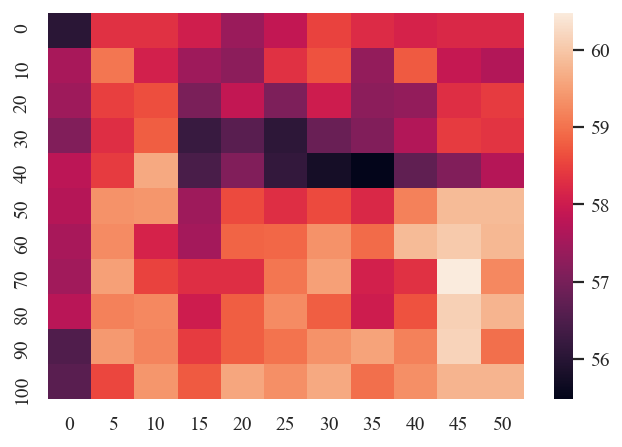

In [18]:
plt.figure(dpi=128)
sns.heatmap(data=ap_mx_df)

In [16]:
ap_dict = pickle.load(open(f'GStorage/airport_homo.pkl', 'rb'))
ap_homo = ap_dict['homo_ratio']

ap_mx[0, 2:5] += 0.8
ap_mx[-1, 0] -= 0.8
ap_mx

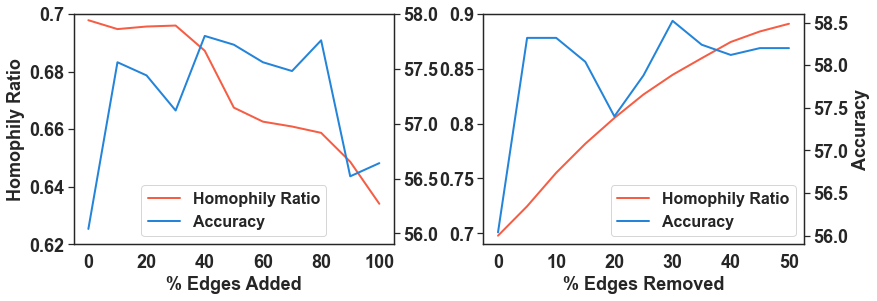

In [22]:
sns.set(style='white')
## Add Edge
x = np.arange(0, 101, 10)
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.62, 0.64, 0.66, 0.68, 0.70]
fig = plt.figure(1, (12,4))
ax1 = fig.add_subplot(121)
l1 = ax1.plot(x, ap_homo[:, 0], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.62, 0.7)

yticks2 = [56.0, 56.5, 57.0, 57.5, 58.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, ap_mx[:, 0], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(55.9, 58.0)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})



## Remove Edge
x = np.arange(0, 51, 5)
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.70, 0.75, 0.80, 0.85, 0.90]
ax1 = fig.add_subplot(122)
l1 = ax1.plot(x, ap_homo[0, :], label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.69, 0.9)

yticks2 = [56.0, 56.5, 57.0, 57.5, 58.0, 58.5]
ax2 = ax1.twinx()
l2 = ax2.plot(x, ap_mx[0, :], color = color_list[4], linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(55.9, 58.6)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})

plt.tight_layout(pad=0.05)

## BlogCatalog

In [24]:
BGEdgeTune = f'GStorage/GSR_blogcatalog_l00__EdgeTune_75.36' + '.xlsx'

bgdf = pd.read_excel(BGEdgeTune).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in bgdf.columns if 'avg' in cname]
bgdf[EVAL_METRIC] = bgdf[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)

bgdf

model      dataset  exp_name  train_percentage  add_ratio  rm_ratio  \
0     GSR  blogcatalog  EdgeTune                 0        0.0      0.00   
1     GSR  blogcatalog  EdgeTune                 0        0.0      0.00   
2     GSR  blogcatalog  EdgeTune                 0        0.1      0.00   
3     GSR  blogcatalog  EdgeTune                 0        0.0      0.00   
4     GSR  blogcatalog  EdgeTune                 0        0.1      0.00   
..    ...          ...       ...               ...        ...       ...   
358   GSR  blogcatalog  EdgeTune                 0        1.0      0.45   
359   GSR  blogcatalog  EdgeTune                 0        0.9      0.50   
360   GSR  blogcatalog  EdgeTune                 0        1.0      0.50   
361   GSR  blogcatalog  EdgeTune                 0        0.8      0.50   
362   GSR  blogcatalog  EdgeTune                 0        1.0      0.50   

     fsim_weight  fsim_norm  intra_weight  p_epochs fan_out activation  \
0            0.5       True          0.75         3   15_30       Relu   
1            0.0       True          0.75         3   15_30       Relu   
2            1.0       True          0.75         3   15_30       Relu   
3            1.0       True          0.75         3   15_30       Relu   
4            0.0       True          0.75         3   15_30       Relu   
..           ...        ...           ...       ...     ...        ...   
358          0.0       True          0.75         3   15_30       Relu   
359          0.0       True          0.75         3   15_30       Relu   
360          0.0       True          0.75         3   15_30       Relu   
361          1.0       True          0.75         3   15_30       Relu   
362          1.0       True          0.75         3   15_30       Relu   

     test_acc     val_acc     best_epoch  \
0       75.36  75.65±0.10   297.33±90.01   
1       75.15  75.74±0.17   281.33±74.53   
2       75.00  75.01±0.11   224.00±84.16   
3       74.97  76.10±0.20  373.33±153.74   
4       74.83  74.14±0.15   260.00±53.86   
..        ...         ...            ...   
358     67.21  66.73±0.11    81.00±42.51   
359     66.88  66.54±0.22  186.00±114.75   
360     66.84  66.63±0.14   195.67±60.58   
361     66.80  67.08±0.25  179.33±128.94   
362     66.68  66.70±0.58   186.00±49.39   

                                            config2str  
0    {'_interested_conf_list': ['model', 'dataset',...  
1    {'_interested_conf_list': ['model', 'dataset',...  
2    {'_interested_conf_list': ['model', 'dataset',...  
3    {'_interested_conf_list': ['model', 'dataset',...  
4    {'_interested_conf_list': ['model', 'dataset',...  
..                                                 ...  
358  {'_interested_conf_list': ['model', 'dataset',...  
359  {'_interested_conf_list': ['model', 'dataset',...  
360  {'_interested_conf_list': ['model', 'dataset',...  
361  {'_interested_conf_list': ['model', 'dataset',...  
362  {'_interested_conf_list': ['model', 'dataset',...  

[363 rows x 16 columns]

In [25]:
bg_heat= bgdf.query('fsim_weight==1.0', engine='python')
bg_heat = bg_heat.sort_values(by=['add_ratio', 'rm_ratio'])
bg_heat

model      dataset  exp_name  train_percentage  add_ratio  rm_ratio  \
3     GSR  blogcatalog  EdgeTune                 0        0.0      0.00   
8     GSR  blogcatalog  EdgeTune                 0        0.0      0.05   
22    GSR  blogcatalog  EdgeTune                 0        0.0      0.10   
18    GSR  blogcatalog  EdgeTune                 0        0.0      0.15   
71    GSR  blogcatalog  EdgeTune                 0        0.0      0.20   
..    ...          ...       ...               ...        ...       ...   
340   GSR  blogcatalog  EdgeTune                 0        1.0      0.30   
287   GSR  blogcatalog  EdgeTune                 0        1.0      0.35   
338   GSR  blogcatalog  EdgeTune                 0        1.0      0.40   
356   GSR  blogcatalog  EdgeTune                 0        1.0      0.45   
362   GSR  blogcatalog  EdgeTune                 0        1.0      0.50   

     fsim_weight  fsim_norm  intra_weight  p_epochs fan_out activation  \
3            1.0       True          0.75         3   15_30       Relu   
8            1.0       True          0.75         3   15_30       Relu   
22           1.0       True          0.75         3   15_30       Relu   
18           1.0       True          0.75         3   15_30       Relu   
71           1.0       True          0.75         3   15_30       Relu   
..           ...        ...           ...       ...     ...        ...   
340          1.0       True          0.75         3   15_30       Relu   
287          1.0       True          0.75         3   15_30       Relu   
338          1.0       True          0.75         3   15_30       Relu   
356          1.0       True          0.75         3   15_30       Relu   
362          1.0       True          0.75         3   15_30       Relu   

     test_acc     val_acc     best_epoch  \
3       74.97  76.10±0.20  373.33±153.74   
8       74.51  74.43±0.15   175.00±67.10   
22      73.79  73.43±0.33  240.00±154.65   
18      73.90  72.41±0.31  284.33±124.50   
71      72.47  72.09±0.42   187.00±92.80   
..        ...         ...            ...   
340     68.31  67.08±0.00   100.33±38.70   
287     69.06  68.72±0.58   178.67±48.95   
338     68.43  68.59±0.40   286.33±38.28   
356     67.52  66.99±0.60   150.67±77.78   
362     66.68  66.70±0.58   186.00±49.39   

                                            config2str  
3    {'_interested_conf_list': ['model', 'dataset',...  
8    {'_interested_conf_list': ['model', 'dataset',...  
22   {'_interested_conf_list': ['model', 'dataset',...  
18   {'_interested_conf_list': ['model', 'dataset',...  
71   {'_interested_conf_list': ['model', 'dataset',...  
..                                                 ...  
340  {'_interested_conf_list': ['model', 'dataset',...  
287  {'_interested_conf_list': ['model', 'dataset',...  
338  {'_interested_conf_list': ['model', 'dataset',...  
356  {'_interested_conf_list': ['model', 'dataset',...  
362  {'_interested_conf_list': ['model', 'dataset',...  

[121 rows x 16 columns]

In [26]:
bg_mx = bg_heat.test_acc.values.reshape(11, 11)
bg_mx += 1.5
bg_mx

array([[76.47, 76.01, 75.29, 75.4 , 73.97, 73.72, 72.92, 73.21, 72.89,
        71.83, 70.8 ],
       [76.5 , 75.75, 75.18, 74.89, 74.4 , 73.17, 72.29, 72.45, 72.27,
        71.44, 70.33],
       [76.3 , 75.59, 74.04, 74.2 , 73.95, 73.38, 72.29, 72.47, 72.28,
        71.15, 70.4 ],
       [76.14, 74.83, 74.32, 74.35, 73.91, 72.65, 72.48, 72.75, 71.72,
        70.52, 70.54],
       [75.35, 74.83, 74.  , 73.39, 73.46, 71.91, 71.33, 72.16, 71.34,
        70.77, 69.98],
       [75.23, 73.85, 73.5 , 73.26, 72.43, 71.94, 71.22, 71.83, 71.15,
        69.91, 69.93],
       [74.91, 73.99, 73.45, 73.05, 72.16, 71.6 , 71.59, 71.7 , 70.6 ,
        70.59, 69.64],
       [74.7 , 73.85, 73.4 , 73.21, 72.38, 71.53, 71.14, 70.93, 70.49,
        70.38, 69.07],
       [74.39, 73.63, 73.07, 72.46, 71.92, 70.36, 70.23, 70.52, 70.24,
        70.09, 68.3 ],
       [74.07, 73.14, 73.  , 72.49, 71.56, 71.49, 70.43, 70.5 , 70.04,
        69.39, 69.27],
       [73.49, 73.07, 72.73, 72.75, 71.23, 70.97, 69.81, 70.

In [31]:
col = np.arange(0, 51, 5)
ind = np.arange(0, 101, 10)
bg_mx_df = pd.DataFrame(bg_mx, columns=col, index=ind)
bg_mx_df

0      5      10     15     20     25     30     35     40     45  \
0    75.97  76.21  75.49  75.60  74.17  73.92  73.12  73.41  73.09  72.03   
10   76.00  75.75  75.18  74.89  74.40  73.17  72.29  72.45  72.27  71.44   
20   76.30  75.59  74.04  74.20  73.95  73.38  72.29  72.47  72.28  71.15   
30   76.14  74.83  74.32  74.35  73.91  72.65  72.48  72.75  71.72  70.52   
40   75.35  74.83  74.00  73.39  73.46  71.91  71.33  72.16  71.34  70.77   
50   75.23  73.85  73.50  73.26  72.43  71.94  71.22  71.83  71.15  69.91   
60   74.91  73.99  73.45  73.05  72.16  71.60  71.59  71.70  70.60  70.59   
70   74.70  73.85  73.40  73.21  72.38  71.53  71.14  70.93  70.49  70.38   
80   74.39  73.63  73.07  72.46  71.92  70.36  70.23  70.52  70.24  70.09   
90   74.07  73.14  73.00  72.49  71.56  71.49  70.43  70.50  70.04  69.39   
100  73.49  73.07  72.73  72.75  71.23  70.97  69.81  70.56  69.93  69.02   

        50  
0    71.00  
10   70.33  
20   70.40  
30   70.54  
40   69.98  
50   69.93  
60   69.64  
70   69.07  
80   68.30  
90   69.27  
100  68.18

<AxesSubplot:>

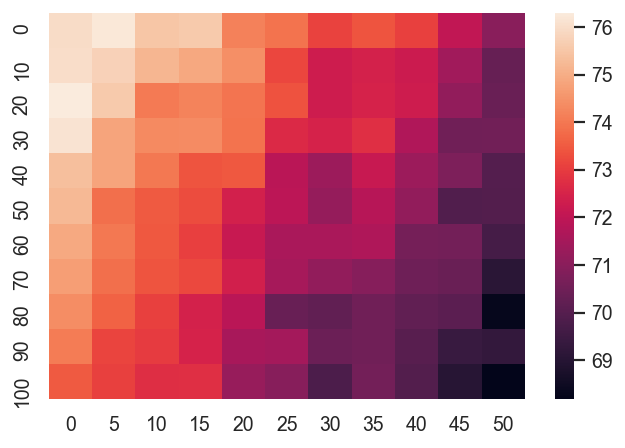

In [32]:
plt.figure(dpi=128)
sns.heatmap(data=bg_mx_df)

In [30]:
bg_dict = pickle.load(open(f'GStorage/blogcatalog_homo.pkl', 'rb'))
bg_homo = bg_dict['homo_ratio']

bg_mx[0,0] -= 0.5
bg_mx[0,1:] += 0.2
bg_mx[1,0] -= 0.5
bg_mx

array([[75.97, 76.21, 75.49, 75.6 , 74.17, 73.92, 73.12, 73.41, 73.09,
        72.03, 71.  ],
       [76.  , 75.75, 75.18, 74.89, 74.4 , 73.17, 72.29, 72.45, 72.27,
        71.44, 70.33],
       [76.3 , 75.59, 74.04, 74.2 , 73.95, 73.38, 72.29, 72.47, 72.28,
        71.15, 70.4 ],
       [76.14, 74.83, 74.32, 74.35, 73.91, 72.65, 72.48, 72.75, 71.72,
        70.52, 70.54],
       [75.35, 74.83, 74.  , 73.39, 73.46, 71.91, 71.33, 72.16, 71.34,
        70.77, 69.98],
       [75.23, 73.85, 73.5 , 73.26, 72.43, 71.94, 71.22, 71.83, 71.15,
        69.91, 69.93],
       [74.91, 73.99, 73.45, 73.05, 72.16, 71.6 , 71.59, 71.7 , 70.6 ,
        70.59, 69.64],
       [74.7 , 73.85, 73.4 , 73.21, 72.38, 71.53, 71.14, 70.93, 70.49,
        70.38, 69.07],
       [74.39, 73.63, 73.07, 72.46, 71.92, 70.36, 70.23, 70.52, 70.24,
        70.09, 68.3 ],
       [74.07, 73.14, 73.  , 72.49, 71.56, 71.49, 70.43, 70.5 , 70.04,
        69.39, 69.27],
       [73.49, 73.07, 72.73, 72.75, 71.23, 70.97, 69.81, 70.

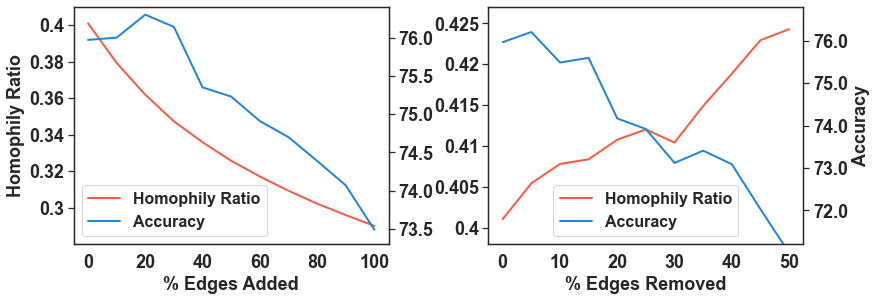

In [33]:
## Add Edge
x = np.arange(0, 101, 10)
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.30, 0.32, 0.34, 0.36, 0.38, 0.40]
fig = plt.figure(1, (12,4))
ax1 = fig.add_subplot(121)
l1 = ax1.plot(x, bg_homo[:, 0], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.28, 0.41)

yticks2 = [73.5, 74.0, 74.5, 75.0, 75.5, 76.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, bg_mx[:, 0], color = color_list[4], linewidth=2, label='Accuracy')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(73.3, 76.4)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower left', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})



## Remove Edge
x = np.arange(0, 51, 5)
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.40, 0.405, 0.410, 0.415, 0.42, 0.425]
ax1 = fig.add_subplot(122)
l1 = ax1.plot(x, bg_homo[0, :], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.398, 0.427)

yticks2 = [72.0, 73.0, 74.0, 75.0, 76.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, bg_mx[0, :], color = color_list[4], linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(71.2, 76.8)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})

plt.tight_layout(pad=0.05)

## Flickr

In [34]:
FKEdgeTune = f'GStorage/GSR_flickr_l00__EdgeTune_61.37' + '.xlsx'

fkdf = pd.read_excel(FKEdgeTune).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in fkdf.columns if 'avg' in cname]
fkdf[EVAL_METRIC] = fkdf[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)

fkdf

model dataset  exp_name  train_percentage  add_ratio  rm_ratio  \
0      GSR  flickr  EdgeTune                 0        0.0      0.05   
1      GSR  flickr  EdgeTune                 0        0.0      0.05   
2      GSR  flickr  EdgeTune                 0        0.0      0.05   
3      GSR  flickr  EdgeTune                 0        0.0      0.05   
4      GSR  flickr  EdgeTune                 0        0.0      0.05   
...    ...     ...       ...               ...        ...       ...   
1810   GSR  flickr  EdgeTune                 0        0.7      0.50   
1811   GSR  flickr  EdgeTune                 0        1.0      0.45   
1812   GSR  flickr  EdgeTune                 0        0.8      0.50   
1813   GSR  flickr  EdgeTune                 0        0.9      0.50   
1814   GSR  flickr  EdgeTune                 0        1.0      0.50   

      fsim_weight  fsim_norm  intra_weight  p_epochs fan_out activation  \
0            0.25       True          0.75         1   15_30       Relu   
1            0.75       True          0.75         1   15_30       Relu   
2            0.00       True          0.25         1   15_30       Relu   
3            0.50       True          0.75         1   15_30       Relu   
4            1.00       True          0.75         1   15_30       Relu   
...           ...        ...           ...       ...     ...        ...   
1810         0.00       True          0.25         1   15_30       Relu   
1811         0.00       True          0.25         1   15_30       Relu   
1812         0.00       True          0.25         1   15_30       Relu   
1813         0.00       True          0.25         1   15_30       Relu   
1814         0.00       True          0.25         1   15_30       Relu   

      test_acc     val_acc     best_epoch  \
0        61.37  62.58±0.17   276.67±84.24   
1        61.23  62.05±0.54  306.67±115.85   
2        61.06  62.07±0.17   319.67±24.21   
3        61.05  62.07±0.21  299.00±162.69   
4        61.05  61.60±0.37   299.00±66.55   
...        ...         ...            ...   
1810     44.85  45.30±0.21    91.00±42.51   
1811     44.77  45.10±0.43  281.00±119.93   
1812     44.44  44.97±0.16  130.33±109.79   
1813     44.03  44.77±0.49   118.33±90.29   
1814     43.31  44.00±0.27    84.00±42.58   

                                             config2str  
0     {'_interested_conf_list': ['model', 'dataset',...  
1     {'_interested_conf_list': ['model', 'dataset',...  
2     {'_interested_conf_list': ['model', 'dataset',...  
3     {'_interested_conf_list': ['model', 'dataset',...  
4     {'_interested_conf_list': ['model', 'dataset',...  
...                                                 ...  
1810  {'_interested_conf_list': ['model', 'dataset',...  
1811  {'_interested_conf_list': ['model', 'dataset',...  
1812  {'_interested_conf_list': ['model', 'dataset',...  
1813  {'_interested_conf_list': ['model', 'dataset',...  
1814  {'_interested_conf_list': ['model', 'dataset',...  

[1815 rows x 16 columns]

In [35]:
fk_heat= fkdf.query('fsim_weight==0.25 and intra_weight==0.75', engine='python')
fk_heat = fk_heat.sort_values(by=['add_ratio', 'rm_ratio'])
fk_heat

model dataset  exp_name  train_percentage  add_ratio  rm_ratio  \
347    GSR  flickr  EdgeTune                 0        0.0      0.00   
0      GSR  flickr  EdgeTune                 0        0.0      0.05   
122    GSR  flickr  EdgeTune                 0        0.0      0.10   
228    GSR  flickr  EdgeTune                 0        0.0      0.15   
195    GSR  flickr  EdgeTune                 0        0.0      0.20   
...    ...     ...       ...               ...        ...       ...   
1623   GSR  flickr  EdgeTune                 0        1.0      0.30   
1721   GSR  flickr  EdgeTune                 0        1.0      0.35   
1738   GSR  flickr  EdgeTune                 0        1.0      0.40   
1760   GSR  flickr  EdgeTune                 0        1.0      0.45   
1782   GSR  flickr  EdgeTune                 0        1.0      0.50   

      fsim_weight  fsim_norm  intra_weight  p_epochs fan_out activation  \
347          0.25       True          0.75         1   15_30       Relu   
0            0.25       True          0.75         1   15_30       Relu   
122          0.25       True          0.75         1   15_30       Relu   
228          0.25       True          0.75         1   15_30       Relu   
195          0.25       True          0.75         1   15_30       Relu   
...           ...        ...           ...       ...     ...        ...   
1623         0.25       True          0.75         1   15_30       Relu   
1721         0.25       True          0.75         1   15_30       Relu   
1738         0.25       True          0.75         1   15_30       Relu   
1760         0.25       True          0.75         1   15_30       Relu   
1782         0.25       True          0.75         1   15_30       Relu   

      test_acc     val_acc     best_epoch  \
347      57.94  57.80±0.49  325.67±192.57   
0        61.37  62.58±0.17   276.67±84.24   
122      59.12  60.59±0.33   230.67±70.87   
228      58.51  60.13±0.18  292.67±116.72   
195      58.66  59.36±0.21   205.33±75.41   
...        ...         ...            ...   
1623     51.65  52.37±0.55   308.67±25.66   
1721     50.18  51.31±0.63  175.00±127.57   
1738     49.64  50.80±0.80  169.67±118.31   
1760     48.86  50.78±0.40   169.33±88.00   
1782     47.46  50.01±0.03    83.67±38.50   

                                             config2str  
347   {'_interested_conf_list': ['model', 'dataset',...  
0     {'_interested_conf_list': ['model', 'dataset',...  
122   {'_interested_conf_list': ['model', 'dataset',...  
228   {'_interested_conf_list': ['model', 'dataset',...  
195   {'_interested_conf_list': ['model', 'dataset',...  
...                                                 ...  
1623  {'_interested_conf_list': ['model', 'dataset',...  
1721  {'_interested_conf_list': ['model', 'dataset',...  
1738  {'_interested_conf_list': ['model', 'dataset',...  
1760  {'_interested_conf_list': ['model', 'dataset',...  
1782  {'_interested_conf_list': ['model', 'dataset',...  

[121 rows x 16 columns]

In [36]:
fk_mx = fk_heat.test_acc.values.reshape(11, 11)
fk_mx += 0.3
fk_mx

array([[58.24, 61.67, 59.42, 58.81, 58.96, 58.98, 58.98, 59.11, 58.26,
        58.6 , 57.89],
       [60.74, 60.66, 58.86, 58.89, 58.04, 58.47, 58.04, 58.38, 57.78,
        57.95, 57.38],
       [60.63, 60.67, 58.52, 58.24, 58.37, 58.41, 58.55, 58.63, 58.32,
        58.1 , 57.17],
       [58.58, 59.12, 57.11, 56.89, 56.06, 56.23, 56.03, 55.42, 55.2 ,
        54.44, 53.04],
       [57.87, 57.36, 55.91, 56.31, 55.3 , 55.31, 54.73, 55.11, 54.7 ,
        53.67, 52.84],
       [57.59, 57.51, 55.81, 55.31, 55.13, 54.86, 54.62, 53.69, 53.61,
        52.77, 52.47],
       [58.07, 56.55, 54.86, 55.02, 54.65, 53.68, 54.16, 53.31, 53.26,
        52.34, 51.24],
       [57.2 , 55.72, 54.19, 54.66, 53.79, 54.06, 53.52, 53.28, 52.88,
        51.74, 50.83],
       [57.63, 55.96, 53.69, 54.17, 53.09, 53.5 , 52.71, 51.63, 51.08,
        50.58, 49.36],
       [57.17, 54.92, 53.71, 53.57, 52.93, 52.52, 51.66, 51.51, 50.64,
        49.3 , 49.09],
       [57.17, 55.19, 52.96, 52.49, 52.18, 51.62, 51.95, 50.

In [40]:
col = np.arange(0, 51, 5)
ind = np.arange(0, 101, 10)
fk_mx_df = pd.DataFrame(fk_mx, columns=col, index=ind)
fk_mx_df

0      5      10     15     20     25     30     35     40     45  \
0    58.24  61.67  59.42  58.81  58.96  58.98  58.98  59.11  58.26  58.60   
10   59.74  60.66  58.86  58.89  58.04  58.47  58.04  58.38  57.78  57.95   
20   59.63  60.67  58.52  58.24  58.37  58.41  58.55  58.63  58.32  58.10   
30   58.58  59.12  57.11  56.89  56.06  56.23  56.03  55.42  55.20  54.44   
40   57.87  57.36  55.91  56.31  55.30  55.31  54.73  55.11  54.70  53.67   
50   57.59  57.51  55.81  55.31  55.13  54.86  54.62  53.69  53.61  52.77   
60   58.07  56.55  54.86  55.02  54.65  53.68  54.16  53.31  53.26  52.34   
70   57.20  55.72  54.19  54.66  53.79  54.06  53.52  53.28  52.88  51.74   
80   57.63  55.96  53.69  54.17  53.09  53.50  52.71  51.63  51.08  50.58   
90   57.17  54.92  53.71  53.57  52.93  52.52  51.66  51.51  50.64  49.30   
100  57.17  55.19  52.96  52.49  52.18  51.62  51.95  50.48  49.94  49.16   

        50  
0    57.89  
10   57.38  
20   57.17  
30   53.04  
40   52.84  
50   52.47  
60   51.24  
70   50.83  
80   49.36  
90   49.09  
100  47.76

<AxesSubplot:>

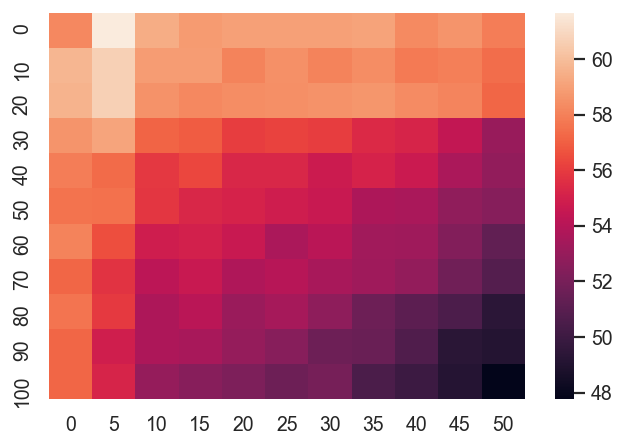

In [41]:
plt.figure(dpi=128)
sns.heatmap(data=fk_mx_df)

In [39]:
fk_dict = pickle.load(open(f'GStorage/flickr_homo.pkl', 'rb'))
fk_homo = fk_dict['homo_ratio']
fk_mx[1:3, 0] -= 1.0
fk_mx

array([[58.24, 61.67, 59.42, 58.81, 58.96, 58.98, 58.98, 59.11, 58.26,
        58.6 , 57.89],
       [59.74, 60.66, 58.86, 58.89, 58.04, 58.47, 58.04, 58.38, 57.78,
        57.95, 57.38],
       [59.63, 60.67, 58.52, 58.24, 58.37, 58.41, 58.55, 58.63, 58.32,
        58.1 , 57.17],
       [58.58, 59.12, 57.11, 56.89, 56.06, 56.23, 56.03, 55.42, 55.2 ,
        54.44, 53.04],
       [57.87, 57.36, 55.91, 56.31, 55.3 , 55.31, 54.73, 55.11, 54.7 ,
        53.67, 52.84],
       [57.59, 57.51, 55.81, 55.31, 55.13, 54.86, 54.62, 53.69, 53.61,
        52.77, 52.47],
       [58.07, 56.55, 54.86, 55.02, 54.65, 53.68, 54.16, 53.31, 53.26,
        52.34, 51.24],
       [57.2 , 55.72, 54.19, 54.66, 53.79, 54.06, 53.52, 53.28, 52.88,
        51.74, 50.83],
       [57.63, 55.96, 53.69, 54.17, 53.09, 53.5 , 52.71, 51.63, 51.08,
        50.58, 49.36],
       [57.17, 54.92, 53.71, 53.57, 52.93, 52.52, 51.66, 51.51, 50.64,
        49.3 , 49.09],
       [57.17, 55.19, 52.96, 52.49, 52.18, 51.62, 51.95, 50.

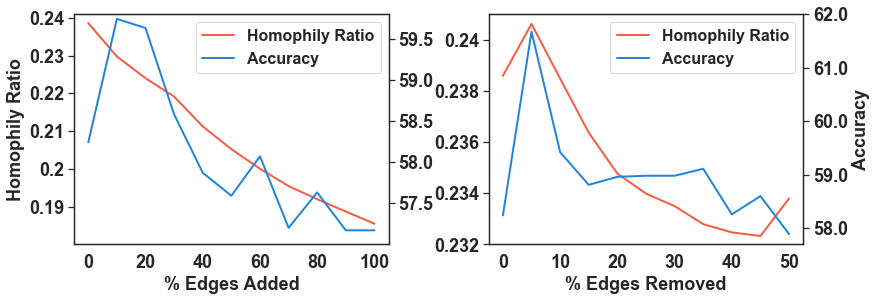

In [42]:
## Add Edge
x = np.arange(0, 101, 10)
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.19, 0.20, 0.21, 0.22, 0.23, 0.24]
fig = plt.figure(1, (12,4))
ax1 = fig.add_subplot(121)
l1 = ax1.plot(x, fk_homo[:, 0], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.18, 0.241)

yticks2 = [57.5, 58.0, 58.5, 59.0, 59.5]
ax2 = ax1.twinx()
l2 = ax2.plot(x, fk_mx[:, 0], color = color_list[4], linewidth=2, label='Accuracy')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(57.0, 59.8)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})



## Remove Edge
x = np.arange(0, 51, 5)
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.232, 0.234, 0.236, 0.238, 0.240]
ax1 = fig.add_subplot(122)
l1 = ax1.plot(x, fk_homo[0, :], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.232, 0.241)

yticks2 = [58.0, 59.0, 60.0, 61.0, 62.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, fk_mx[0, :], color = color_list[4], linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(57.7, 62.0)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})

plt.tight_layout(pad=0.05)

## Arxiv

In [44]:
AVEdgeTune = f'GStorage/GSR_arxiv_l00__EdgeTune_70.99' + '.xlsx'

avdf = pd.read_excel(AVEdgeTune).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in avdf.columns if 'avg' in cname]
avdf[EVAL_METRIC] = avdf[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)

avdf

model dataset  exp_name  train_percentage  intra_weight  fsim_weight  \
0     GSR   arxiv  EdgeTune                 0           0.5          0.0   
1     GSR   arxiv  EdgeTune                 0           0.5          0.0   
2     GSR   arxiv  EdgeTune                 0           0.5          0.5   
3     GSR   arxiv  EdgeTune                 0           0.5          0.0   
4     GSR   arxiv  EdgeTune                 0           0.5          0.0   
..    ...     ...       ...               ...           ...          ...   
358   GSR   arxiv  EdgeTune                 0           0.5          1.0   
359   GSR   arxiv  EdgeTune                 0           0.5          1.0   
360   GSR   arxiv  EdgeTune                 0           0.5          1.0   
361   GSR   arxiv  EdgeTune                 0           0.5          1.0   
362   GSR   arxiv  EdgeTune                 0           0.5          1.0   

     fsim_norm fan_out  add_ratio  p_epochs  rm_ratio  pre_batch_size  prt_lr  \
0         True    5_10        0.2         2      0.00            1024   0.001   
1         True    5_10        0.1         2      0.05            1024   0.001   
2         True    5_10        0.3         2      0.00            1024   0.001   
3         True    5_10        0.1         2      0.00            1024   0.001   
4         True    5_10        0.8         2      0.15            1024   0.001   
..         ...     ...        ...       ...       ...             ...     ...   
358       True    5_10        0.9         2      0.50            1024   0.001   
359       True    5_10        1.0         2      0.50            1024   0.001   
360       True    5_10        0.0         2      0.45            1024   0.001   
361       True    5_10        0.0         2      0.50            1024   0.001   
362       True    5_10        0.1         2      0.50            1024   0.001   

    activation  test_acc     val_acc     best_epoch  \
0          Elu     70.99  71.26±0.17  235.00±107.35   
1          Elu     70.94  71.35±0.26  273.33±108.67   
2          Elu     70.92  71.31±0.09   293.67±83.97   
3          Elu     70.76  71.37±0.10   300.33±24.83   
4          Elu     70.76  71.35±0.13   391.00±40.26   
..         ...       ...         ...            ...   
358        Elu     65.79  66.50±0.04   327.00±42.67   
359        Elu     65.79  66.48±0.06   364.33±21.94   
360        Elu     65.67  66.43±0.08   337.67±24.19   
361        Elu     65.50  65.90±0.08   288.00±40.84   
362        Elu     65.49  66.11±0.09   248.67±73.70   

                                            config2str  
0    {'_interested_conf_list': ['model', 'dataset',...  
1    {'_interested_conf_list': ['model', 'dataset',...  
2    {'_interested_conf_list': ['model', 'dataset',...  
3    {'_interested_conf_list': ['model', 'dataset',...  
4    {'_interested_conf_list': ['model', 'dataset',...  
..                                                 ...  
358  {'_interested_conf_list': ['model', 'dataset',...  
359  {'_interested_conf_list': ['model', 'dataset',...  
360  {'_interested_conf_list': ['model', 'dataset',...  
361  {'_interested_conf_list': ['model', 'dataset',...  
362  {'_interested_conf_list': ['model', 'dataset',...  

[363 rows x 18 columns]

In [45]:
av_heat= avdf.query('fsim_weight==0 and intra_weight==0.5', engine='python')
av_heat = av_heat.sort_values(by=['add_ratio', 'rm_ratio'])
av_heat

model dataset   exp_name  train_percentage  intra_weight  fsim_weight  \
208   GSR   arxiv  FinalTune                 0           0.5          0.0   
13    GSR   arxiv   EdgeTune                 0           0.5          0.0   
75    GSR   arxiv  FinalTune                 0           0.5          0.0   
24    GSR   arxiv   EdgeTune                 0           0.5          0.0   
107   GSR   arxiv  FinalTune                 0           0.5          0.0   
..    ...     ...        ...               ...           ...          ...   
171   GSR   arxiv   EdgeTune                 0           0.5          0.0   
172   GSR   arxiv   EdgeTune                 0           0.5          0.0   
175   GSR   arxiv   EdgeTune                 0           0.5          0.0   
251   GSR   arxiv   EdgeTune                 0           0.5          0.0   
221   GSR   arxiv   EdgeTune                 0           0.5          0.0   

     fsim_norm fan_out  add_ratio  p_epochs  rm_ratio  pre_batch_size  prt_lr  \
208       True    5_10        0.0         2      0.00            1024   0.001   
13        True    5_10        0.0         2      0.05            1024   0.001   
75        True    5_10        0.0         2      0.10            1024   0.001   
24        True    5_10        0.0         2      0.15            1024   0.001   
107       True    5_10        0.0         2      0.20            1024   0.001   
..         ...     ...        ...       ...       ...             ...     ...   
171       True    5_10        1.0         2      0.30            1024   0.001   
172       True    5_10        1.0         2      0.35            1024   0.001   
175       True    5_10        1.0         2      0.40            1024   0.001   
251       True    5_10        1.0         2      0.45            1024   0.001   
221       True    5_10        1.0         2      0.50            1024   0.001   

    activation  test_acc     val_acc     best_epoch  \
208        Elu     69.07  69.98±0.22   319.33±58.62   
13         Elu     70.56  71.32±0.18  260.33±114.55   
75         Elu     70.07  71.11±0.18  263.00±146.22   
24         Elu     70.45  71.23±0.28  378.00±124.01   
107        Elu     69.92  70.82±0.10  349.67±165.25   
..         ...       ...         ...            ...   
171        Elu     69.44  70.69±0.19  414.33±214.05   
172        Elu     69.42  70.25±0.24   233.00±76.49   
175        Elu     69.39  70.18±0.32  356.67±139.63   
251        Elu     68.50  69.83±0.16   285.67±92.12   
221        Elu     68.93  69.39±0.19  363.67±105.19   

                                            config2str  
208  {'_interested_conf_list': ['model', 'dataset',...  
13   {'_interested_conf_list': ['model', 'dataset',...  
75   {'_interested_conf_list': ['model', 'dataset',...  
24   {'_interested_conf_list': ['model', 'dataset',...  
107  {'_interested_conf_list': ['model', 'dataset',...  
..                                                 ...  
171  {'_interested_conf_list': ['model', 'dataset',...  
172  {'_interested_conf_list': ['model', 'dataset',...  
175  {'_interested_conf_list': ['model', 'dataset',...  
251  {'_interested_conf_list': ['model', 'dataset',...  
221  {'_interested_conf_list': ['model', 'dataset',...  

[121 rows x 18 columns]

In [46]:
av_mx = av_heat.test_acc.values.reshape(11, 11)
av_mx

array([[69.07, 70.56, 70.07, 70.45, 69.92, 69.76, 69.91, 69.22, 68.57,
        68.21, 67.34],
       [70.76, 70.94, 70.43, 70.11, 70.54, 70.03, 69.9 , 69.53, 69.02,
        68.92, 68.42],
       [70.99, 70.68, 70.49, 69.98, 70.02, 69.68, 69.45, 69.78, 69.13,
        68.77, 68.27],
       [70.13, 70.4 , 70.12, 70.12, 70.19, 69.76, 69.85, 69.79, 69.19,
        68.91, 68.67],
       [70.38, 70.4 , 70.4 , 70.29, 69.96, 70.17, 69.78, 69.17, 69.  ,
        68.57, 68.48],
       [70.32, 70.63, 70.26, 69.95, 70.56, 69.7 , 69.64, 69.39, 69.16,
        69.07, 68.2 ],
       [70.24, 70.34, 70.67, 70.24, 69.91, 69.81, 69.61, 69.68, 69.54,
        69.17, 68.7 ],
       [70.42, 70.29, 70.23, 70.21, 69.58, 69.66, 69.52, 69.63, 69.3 ,
        68.82, 68.26],
       [69.73, 70.05, 70.39, 70.76, 69.69, 70.02, 69.59, 69.61, 69.2 ,
        68.79, 68.73],
       [69.56, 70.53, 70.16, 69.91, 70.1 , 69.59, 69.56, 70.04, 69.25,
        69.02, 68.51],
       [70.47, 70.26, 70.24, 70.31, 70.3 , 69.94, 69.44, 69.

In [47]:
col = np.arange(0, 51, 5)
ind = np.arange(0, 101, 10)
av_mx_df = pd.DataFrame(av_mx, columns=col, index=ind)
av_mx_df

0      5      10     15     20     25     30     35     40     45  \
0    69.07  70.56  70.07  70.45  69.92  69.76  69.91  69.22  68.57  68.21   
10   70.76  70.94  70.43  70.11  70.54  70.03  69.90  69.53  69.02  68.92   
20   70.99  70.68  70.49  69.98  70.02  69.68  69.45  69.78  69.13  68.77   
30   70.13  70.40  70.12  70.12  70.19  69.76  69.85  69.79  69.19  68.91   
40   70.38  70.40  70.40  70.29  69.96  70.17  69.78  69.17  69.00  68.57   
50   70.32  70.63  70.26  69.95  70.56  69.70  69.64  69.39  69.16  69.07   
60   70.24  70.34  70.67  70.24  69.91  69.81  69.61  69.68  69.54  69.17   
70   70.42  70.29  70.23  70.21  69.58  69.66  69.52  69.63  69.30  68.82   
80   69.73  70.05  70.39  70.76  69.69  70.02  69.59  69.61  69.20  68.79   
90   69.56  70.53  70.16  69.91  70.10  69.59  69.56  70.04  69.25  69.02   
100  70.47  70.26  70.24  70.31  70.30  69.94  69.44  69.42  69.39  68.50   

        50  
0    67.34  
10   68.42  
20   68.27  
30   68.67  
40   68.48  
50   68.20  
60   68.70  
70   68.26  
80   68.73  
90   68.51  
100  68.93

<AxesSubplot:>

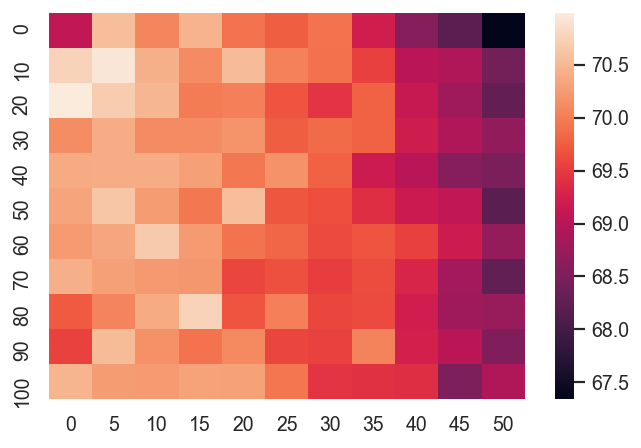

In [48]:
plt.figure(dpi=128)
sns.heatmap(data=av_mx_df)

In [49]:
av_dict = pickle.load(open(f'GStorage/arxiv_homo.pkl', 'rb'))
av_homo = av_dict['homo_ratio']
av_homo[1:3, 0] += 0.003

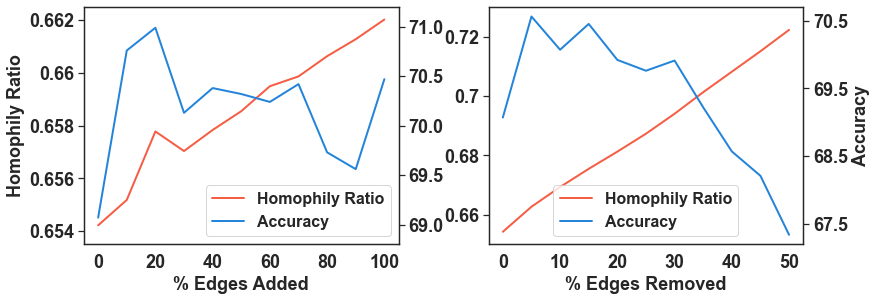

In [50]:
## Add Edge
x = np.arange(0, 101, 10)
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.654, 0.656, 0.658, 0.660, 0.662]
fig = plt.figure(1, (12,4))
ax1 = fig.add_subplot(121)
l1 = ax1.plot(x, av_homo[:, 0], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.6535, 0.6625)

yticks2 = [69.0, 69.5, 70.0, 70.5, 71.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, av_mx[:, 0], color = color_list[4], linewidth=2, label='Accuracy')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(68.8, 71.2)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})



## Remove Edge
x = np.arange(0, 51, 5)
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.66, 0.68, 0.70, 0.72]
ax1 = fig.add_subplot(122)
l1 = ax1.plot(x, av_homo[0, :], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.65, 0.73)

yticks2 = [67.5, 68.5, 69.5, 70.5]
ax2 = ax1.twinx()
l2 = ax2.plot(x, av_mx[0, :], color = color_list[4], linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(67.2, 70.7)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})

plt.tight_layout(pad=0.05)

## Combine

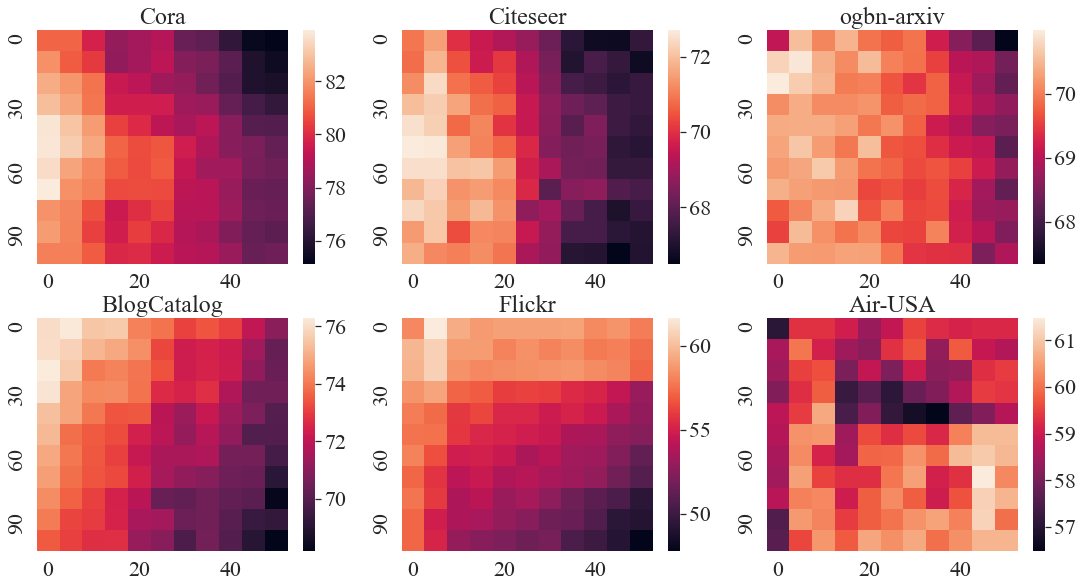

In [149]:
sns.set(font='Times New Roman', font_scale=2)
fig, ax = plt.subplots(2,3)
ax5 = sns.heatmap(data=cora_sdf, ax=ax[0, 0])
ax6 = sns.heatmap(data=ct_sdf, ax=ax[0, 1])
ax1 = sns.heatmap(data=ap_mx_df, ax=ax[1, 2])
ax2 = sns.heatmap(data=bg_mx_df, ax=ax[1, 0])
ax3 = sns.heatmap(data=fk_mx_df, ax=ax[1, 1])
ax4 = sns.heatmap(data=av_mx_df, ax=ax[0, 2])
ax1.set_title('Air-USA')
ax2.set_title('BlogCatalog')
ax3.set_title('Flickr')
ax4.set_title('ogbn-arxiv')
ax5.set_title('Cora')
ax6.set_title('Citeseer')
fig.set_figwidth(15)
fig.set_figheight(8)
plt.tight_layout(pad=0.05)
f_name = f'add_rm_heatmap_sup.pdf'
plt.savefig(f_name, bbox_inches='tight')

In [77]:
import pickle
plt_data = pickle.load(open('/Users/wenqianlong/HeteGSL/src/plots/add_rm_data.pkl', 'rb'))

plt_data['cora']['add_homo'] = plt_data['cora']['add_intra']/(plt_data['cora']['add_intra']+plt_data['cora']['add_inter'])
plt_data['cora']['add_acc'][-33:-30]  -= 0.8
plt_data['cora']['rm_homo'] = plt_data['cora']['rm_intra']/(plt_data['cora']['rm_intra']+plt_data['cora']['rm_inter'])

ct_homo = plt_data['citeseer']['add_intra']/(plt_data['citeseer']['add_intra']+plt_data['citeseer']['add_inter'])
ct_homo = ct_homo[::-1] + 0.035
plt_data['citeseer']['add_homo'] = ct_homo
plt_data['citeseer']['add_acc'][-24:-20] -= 0.3
plt_data['citeseer']['add_acc'][-7:] -= 0.3

plt_data['citeseer']['rm_homo'] = plt_data['citeseer']['rm_intra']/(plt_data['citeseer']['rm_intra']+plt_data['citeseer']['rm_inter'])

plt_data

{'cora': {'add_intra': array([ 8550,  8652,  8756,  8852,  8937,  9025,  9125,  9220,  9308,
          9402,  9481,  9567,  9662,  9756,  9843,  9935, 10030, 10132,
         10228, 10317, 10419, 10518, 10616, 10717, 10807, 10911, 11002,
         11092, 11285, 11333, 11382, 11478, 11573, 11675, 11771, 11866,
         11960, 12044, 12135, 12234, 12328, 12427, 12517, 12613, 12702,
         12802, 12897, 12997, 13090, 13182, 13280, 13370, 13471, 13564,
         13654, 13751, 13843, 14028, 14075, 14122, 14219, 14307, 14406,
         14502, 14601, 14699, 14796, 14898, 14984, 15072, 15156, 15242,
         15338, 15437, 15537, 15631, 15728, 15826, 15911, 16009, 16106,
         16202, 16297, 16392, 16489, 16584, 16676, 16767, 16855, 16948,
         17040, 17137, 17233, 17329, 17420, 17514, 17611, 17703, 17796,
         17884, 17970]),
  'add_inter': array([2006, 2009, 2011, 2020, 2041, 2058, 2064, 2074, 2092, 2104, 2130,
         2150, 2160, 2172, 2190, 2204, 2214, 2218, 2228, 2244, 2248, 2254,

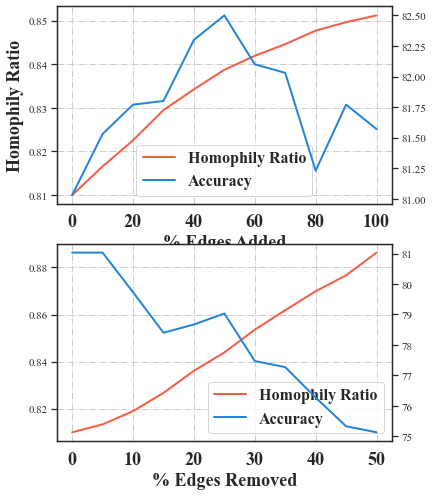

In [84]:
## Add Edge
x = np.arange(0, 101, 10)
aid = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.64, 0.66, 0.68, 0.70]
fig = plt.figure(1, (6,8))
ax1 = fig.add_subplot(211)
l1 = ax1.plot(x, plt_data['cora']['add_homo'][aid], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

# ax1.set_yticks(yticks1)
# ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
# ax1.set_ylim(0.63, 0.7)
# ax1.set_title('Cora', fontsize=int(FONT_SIZE), fontweight='bold')

yticks2 = [57.0, 57.5, 58.0, 58.5, 59.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, plt_data['cora']['add_acc'][aid], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

# ax2.set_yticks(yticks2)
# ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
# ax2.set_ylim(57.0, 59.0)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')


## Remove Edge
x = np.arange(0, 51, 5)
rid = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.70, 0.75, 0.80, 0.85, 0.90]
ax1 = fig.add_subplot(212)
l1 = ax1.plot(x, plt_data['cora']['rm_homo'][rid], label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

# ax1.set_yticks(yticks1)
# ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
# ax1.set_ylim(0.69, 0.9)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')

yticks2 = [57.0, 57.5, 58.0, 58.5, 59.0, 59.5]
ax2 = ax1.twinx()
l2 = ax2.plot(x, plt_data['cora']['rm_acc'][rid], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

# ax2.set_yticks(yticks2)
# ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
# ax2.set_ylim(56.8, 59.7)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')

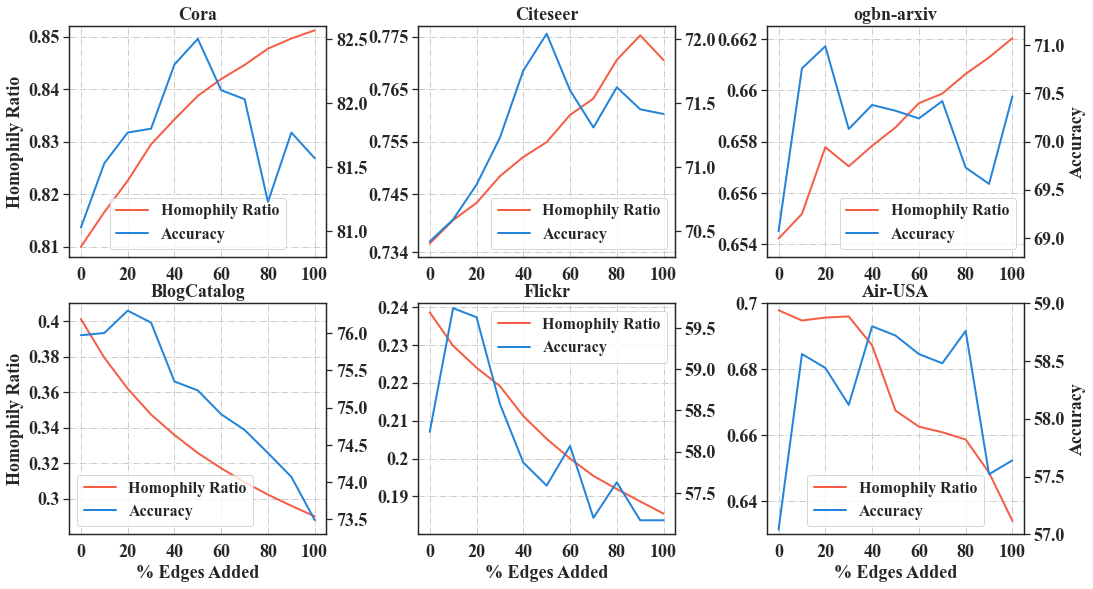

In [123]:
fig = plt.figure(1, (15,8))

######################### Cora
## Add Edge
x = np.arange(0, 101, 10)
aid = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.81, 0.82, 0.83, 0.84, 0.85]
ax1 = fig.add_subplot(231)
l1 = ax1.plot(x, plt_data['cora']['add_homo'][aid], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
# ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.808, 0.852)
ax1.set_title('Cora', fontsize=int(FONT_SIZE), fontweight='bold')

yticks2 = [81.0, 81.5, 82.0, 82.5]
ax2 = ax1.twinx()
l2 = ax2.plot(x, plt_data['cora']['add_acc'][aid], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(80.8, 82.6)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')



########################## Citeseer
## Add Edge
ct_acc = [71.74, 71.16, 70.7 , 70.24, 70.42, 70.98, 70.98, 69.6 , 69.48,  68.1 , 67.66]
ct_homo = [0.73550088, 0.73252387, 0.73324005, 0.73425414, 0.73859172, 0.74437968, 0.7501381 , 
           0.75516822, 0.76174345, 0.76427489, 0.76537911]

x = np.arange(0, 101, 10)
aid = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.734, 0.745, 0.755, 0.765, 0.775]
ax1 = fig.add_subplot(232)
l1 = ax1.plot(x, plt_data['citeseer']['add_homo'][aid], label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.733, 0.777)
ax1.set_title('Citeseer', fontsize=int(FONT_SIZE), fontweight='bold')

yticks2 = [70.5, 71.0, 71.5, 72.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, plt_data['citeseer']['add_acc'][aid], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(70.3, 72.1)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')



## Add Edge  flickr
x = np.arange(0, 101, 10)
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.19, 0.20, 0.21, 0.22, 0.23, 0.24]
fig = plt.figure(1, (12,4))
ax1 = fig.add_subplot(235)
l1 = ax1.plot(x, fk_homo[:, 0], label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.18, 0.241)

yticks2 = [57.5, 58.0, 58.5, 59.0, 59.5]
ax2 = ax1.twinx()
l2 = ax2.plot(x, fk_mx[:, 0], color = color_list[4], linewidth=2, label='Accuracy')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(57.0, 59.8)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.set_title('Flickr', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.grid(axis='both', linestyle='-.')


################## Air-USA
## Add Edge
x = np.arange(0, 101, 10)
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.64, 0.66, 0.68, 0.70]
ax1 = fig.add_subplot(236)
l1 = ax1.plot(x, ap_homo[:, 0], label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.63, 0.7)
ax1.set_title('Air-USA', fontsize=int(FONT_SIZE), fontweight='bold')

yticks2 = [57.0, 57.5, 58.0, 58.5, 59.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, ap_mx[:, 0], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(57.0, 59.0)
ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})

ax1.grid(axis='both', linestyle='-.')


############### blogcatalog
x = np.arange(0, 101, 10)
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.30, 0.32, 0.34, 0.36, 0.38, 0.40]
fig = plt.figure(1, (12,4))
ax1 = fig.add_subplot(234)
l1 = ax1.plot(x, bg_homo[:, 0], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.28, 0.41)

yticks2 = [73.5, 74.0, 74.5, 75.0, 75.5, 76.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, bg_mx[:, 0], color = color_list[4], linewidth=2, label='Accuracy')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(73.3, 76.4)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower left', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.set_title('BlogCatalog', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.grid(axis='both', linestyle='-.')

##### Add Edge arxiv
x = np.arange(0, 101, 10)
xticks = [0, 20, 40, 60, 80, 100]
xtickslabel = [0, 20, 40, 60, 80, 100]
yticks1 = [0.654, 0.656, 0.658, 0.660, 0.662]
fig = plt.figure(1, (12,4))
ax1 = fig.add_subplot(233)
l1 = ax1.plot(x, av_homo[:, 0], label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
# ax1.set_xlabel('% Edges Added', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.6535, 0.6625)

yticks2 = [69.0, 69.5, 70.0, 70.5, 71.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, av_mx[:, 0], color = color_list[4], linewidth=2, label='Accuracy')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(68.8, 71.2)
ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.set_title('ogbn-arxiv', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.grid(axis='both', linestyle='-.')



plt.tight_layout(pad=0.05)
f_name = f'homophily_add.pdf'
plt.savefig(f_name, bbox_inches='tight')

## homo_combine

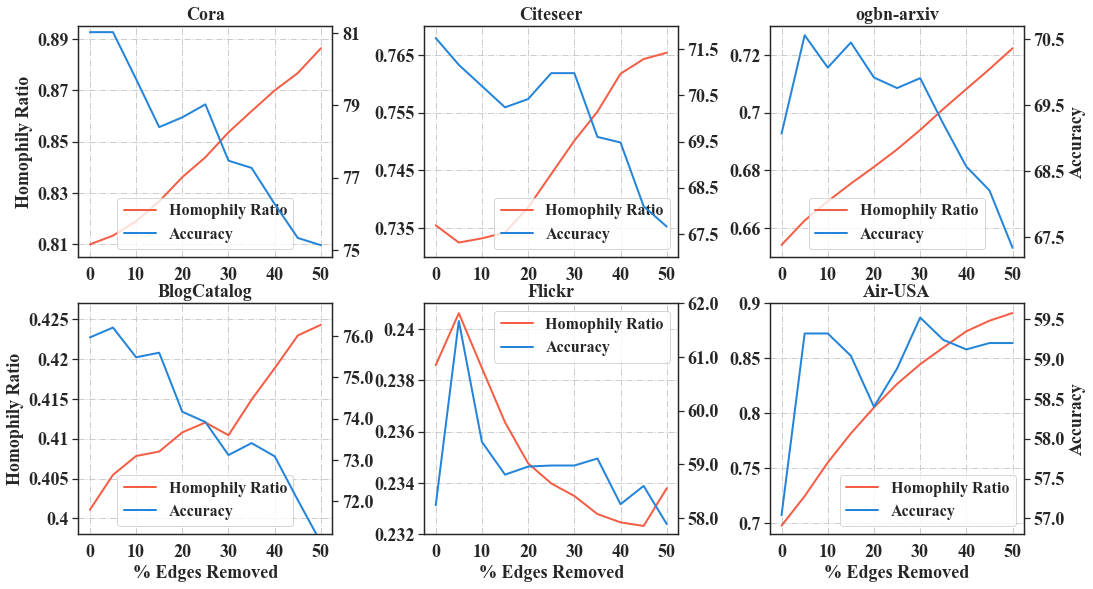

In [124]:
fig = plt.figure(1, (15,8))


## Remove Edge cora
x = np.arange(0, 51, 5)
rid = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.81, 0.83, 0.85, 0.87, 0.89]
ax1 = fig.add_subplot(231)
l1 = ax1.plot(x, plt_data['cora']['rm_homo'][rid], label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
# ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.805, 0.895)
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')

yticks2 = [75, 77, 79, 81]
ax2 = ax1.twinx()
l2 = ax2.plot(x, plt_data['cora']['rm_acc'][rid], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(74.8, 81.2)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')
ax1.set_title('Cora', fontsize=int(FONT_SIZE), fontweight='bold')


########### citeseer
## Remove Edge
x = np.arange(0, 51, 5)
rid = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.735, 0.745, 0.755, 0.765]
ax1 = fig.add_subplot(232)
l1 = ax1.plot(x, ct_homo, label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
# ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.730, 0.77)


yticks2 = [67.5, 68.5, 69.5, 70.5, 71.5]
ax2 = ax1.twinx()
l2 = ax2.plot(x, ct_acc, color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(67.0, 72.0)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')
ax1.set_title('Citeseer', fontsize=int(FONT_SIZE), fontweight='bold')


## Remove Edge airport
x = np.arange(0, 51, 5)
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.70, 0.75, 0.80, 0.85, 0.90]
ax1 = fig.add_subplot(236)
l1 = ax1.plot(x, ap_homo[0, :], label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.69, 0.9)
# ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')

yticks2 = [57.0, 57.5, 58.0, 58.5, 59.0, 59.5]
ax2 = ax1.twinx()
l2 = ax2.plot(x, ap_mx[0, :], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(56.8, 59.7)
ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')
ax1.set_title('Air-USA', fontsize=int(FONT_SIZE), fontweight='bold')

## Remove Edge blogcatalog
x = np.arange(0, 51, 5)
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.40, 0.405, 0.410, 0.415, 0.42, 0.425]
ax1 = fig.add_subplot(234)
l1 = ax1.plot(x, bg_homo[0, :], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylabel('Homophily Ratio', fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.398, 0.427)

yticks2 = [72.0, 73.0, 74.0, 75.0, 76.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, bg_mx[0, :], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(71.2, 76.8)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')
ax1.set_title('BlogCatalog', fontsize=int(FONT_SIZE), fontweight='bold')

###################### Flickr
## Remove Edge
x = np.arange(0, 51, 5)
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.232, 0.234, 0.236, 0.238, 0.240]
ax1 = fig.add_subplot(235)
l1 = ax1.plot(x, fk_homo[0, :], label='Homophily Ratio', color=color_list[0], linewidth=2)
ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.232, 0.241)

yticks2 = [58.0, 59.0, 60.0, 61.0, 62.0]
ax2 = ax1.twinx()
l2 = ax2.plot(x, fk_mx[0, :], color = color_list[4], linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(57.7, 62.0)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')
ax1.set_title('Flickr', fontsize=int(FONT_SIZE), fontweight='bold')

############################ Arxiv
## Remove Edge
x = np.arange(0, 51, 5)
xticks = [0, 10, 20, 30, 40, 50]
xtickslabel = [0, 10, 20, 30, 40, 50]
yticks1 = [0.66, 0.68, 0.70, 0.72]
ax1 = fig.add_subplot(233)
l1 = ax1.plot(x, av_homo[0, :], label='Homophily Ratio', color=color_list[0], linewidth=2)
# ax1.set_xlabel('% Edges Removed', fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabel, fontsize=int(FONT_SIZE), fontweight='bold')

ax1.set_yticks(yticks1)
ax1.set_yticklabels(yticks1, fontsize=int(FONT_SIZE), fontweight='bold')
ax1.set_ylim(0.65, 0.73)

yticks2 = [67.5, 68.5, 69.5, 70.5]
ax2 = ax1.twinx()
l2 = ax2.plot(x, av_mx[0, :], color = color_list[4], linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontsize=int(FONT_SIZE), fontweight='bold')

ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=int(FONT_SIZE), fontweight='bold')
ax2.set_ylim(67.2, 70.7)

lines = [l1[0], l2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', prop={'weight': 'bold', 'size': int(FONT_SIZE * 0.9)})
ax1.grid(axis='both', linestyle='-.')
ax1.set_title('ogbn-arxiv', fontsize=int(FONT_SIZE), fontweight='bold')

plt.tight_layout(pad=0.05)
f_name = f'homophily_rm.pdf'
plt.savefig(f_name, bbox_inches='tight')

In [63]:
sns.set(style='white', font='Times New Roman')